This notebook has the following purposes (each for fresh and frozen samples):
- Assessing sample cell type composition
- Selecting a subsample of cells from highest-abundant non-malignant cell types as reference for inferCNV
- Appending chromosomal location information to genes to inform inferCNV
- Saving adata with malignant cells, selected reference cells, and chromosomal location information 


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import matplotlib.pyplot as plt
import collections
import os
import re

In [ ]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.2 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.6 pynndescent==0.5.4


In [3]:
seed = 92
np.random.seed(seed)

# 01 Process fresh samples

# Creating subset of data

In [ ]:
adata_fresh = sc.read("fresh_selected.h5ad")

In [5]:
adata_fresh

AnnData object with n_obs × n_vars = 157531 × 2314
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_primar

In [6]:
adata_fresh.obs

,batch,cell_id,name,condition,replicate,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,...,leiden_mal,labels_cl_unif2_mal,labels_cl_unif2,labels_cl_unif2_broad,named_cluster,concat,named_cluster_split,compartments,select_cell,cell_type
cellid,,,,,,,,,,,,,,,,,,,,,
HTAPP-983-SMP-7659-fresh-channel1_CTCATTAAGTTCTACG-1,0,HTAPP-983-SMP-7659-fresh-channel1_CTCATTAAGTTC...,HTAPP-983-SMP-7659,fresh,channel1,HTAPP-983-SMP-7659-fresh-channel1,19976,5740,14.121946,7,...,42_True,Epithelial,Epithelial,Epithelial,Epithelial_42,Epithelial_Epithelial,Epithelial,Malignant,True,MBC
HTAPP-983-SMP-7659-fresh-channel1_GGGTCTGGTGCTCCGA-1,0,HTAPP-983-SMP-7659-fresh-channel1_GGGTCTGGTGCT...,HTAPP-983-SMP-7659,fresh,channel1,HTAPP-983-SMP-7659-fresh-channel1,19942,5803,15.951259,7,...,42_True,Epithelial,Epithelial,Epithelial,Epithelial_42,Epithelial_Epithelial,Epithelial,Malignant,True,MBC
HTAPP-983-SMP-7659-fresh-channel1_CGATGCGCATAAGATG-1,0,HTAPP-983-SMP-7659-fresh-channel1_CGATGCGCATAA...,HTAPP-983-SMP-7659,fresh,channel1,HTAPP-983-SMP-7659-fresh-channel1,19879,5415,13.104281,7,...,42_True,Epithelial,Epithelial,Epithelial,Epithelial_42,Epithelial_Epithelial,Epithelial,Malignant,True,MBC
HTAPP-983-SMP-7659-fresh-channel1_TTTGACTTCATCTATC-1,0,HTAPP-983-SMP-7659-fresh-channel1_TTTGACTTCATC...,HTAPP-983-SMP-7659,fresh,channel1,HTAPP-983-SMP-7659-fresh-channel1,19835,5882,15.669271,7,...,42_True,Epithelial,Epithelial,Epithelial,Epithelial_42,Epithelial_Epithelial,Epithelial,Malignant,True,MBC
HTAPP-983-SMP-7659-fresh-channel1_TGCATGAAGACTGTTC-1,0,HTAPP-983-SMP-7659-fresh-channel1_TGCATGAAGACT...,HTAPP-983-SMP-7659,fresh,channel1,HTAPP-983-SMP-7659-fresh-channel1,19753,6063,18.579456,7,...,42_True,Epithelial,Epithelial,Epithelial,Epithelial_42,Epithelial_Epithelial,Epithelial,Malignant,True,MBC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HTAPP-812-SMP-8239-fresh-channel1_TCCTCTTGTGACTCTA-1,46,HTAPP-812-SMP-8239-fresh-channel1_TCCTCTTGTGAC...,HTAPP-812-SMP-8239,fresh,channel1,HTAPP-812-SMP-8239-fresh-channel1,583,125,0.514580,17,...,19_False,Macrophage,Macrophage,Macrophage,Macrophage_19,Macrophage_Macrophage,Macrophage,Myeloid,True,Macrophage
HTAPP-812-SMP-8239-fresh-channel1_ACTTCCGGTGGCGCTT-1,46,HTAPP-812-SMP-8239-fresh-channel1_ACTTCCGGTGGC...,HTAPP-812-SMP-8239,fresh,channel1,HTAPP-812-SMP-8239-fresh-channel1,585,216,1.025641,11,...,4_False,Macrophage,Macrophage,Macrophage,Macrophage_4,Macrophage_Adipocytes,Macrophage,Myeloid,True,Macrophage
HTAPP-812-SMP-8239-fresh-channel1_CGTAAGTCAACAGCTT-1,46,HTAPP-812-SMP-8239-fresh-channel1_CGTAAGTCAACA...,HTAPP-812-SMP-8239,fresh,channel1,HTAPP-812-SMP-8239-fresh-channel1,577,167,1.906412,17,...,4_False,Macrophage,Macrophage,Macrophage,Macrophage_4,Macrophage_Macrophage,Macrophage,Myeloid,True,Macrophage


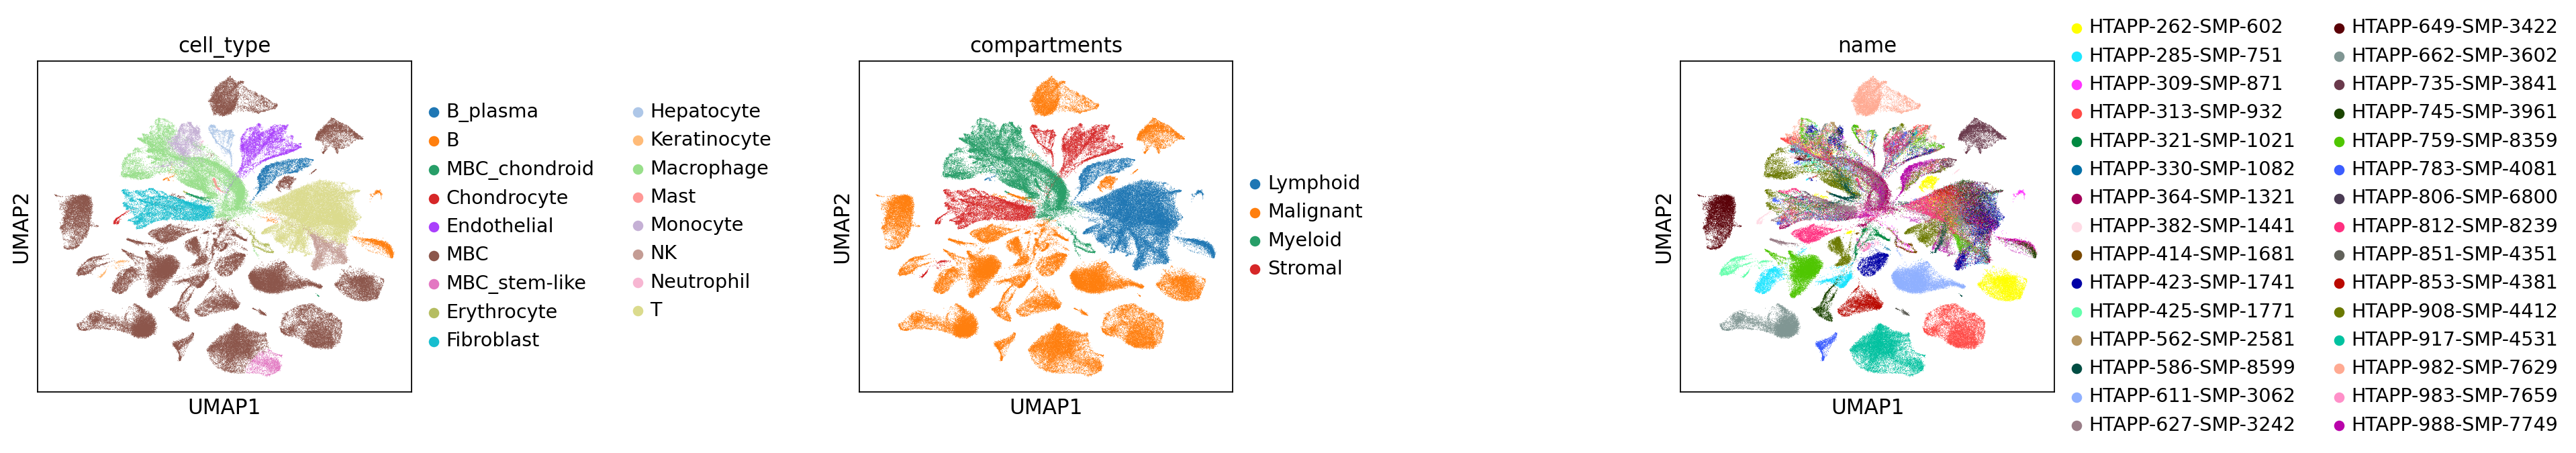

In [ ]:
sc.pl.umap(adata_fresh, color=["cell_type", "compartments", "name"], wspace=1)

['MBC', 'Endothelial', 'Macrophage', 'Fibroblast', 'Monocyte', 'T', 'Chondrocyte', 'Erythrocyte', 'Hepatocyte', 'NK', 'B', 'B_plasma', 'Mast', 'Keratinocyte', 'MBC_stem-like', 'Neutrophil', 'MBC_chondroid']


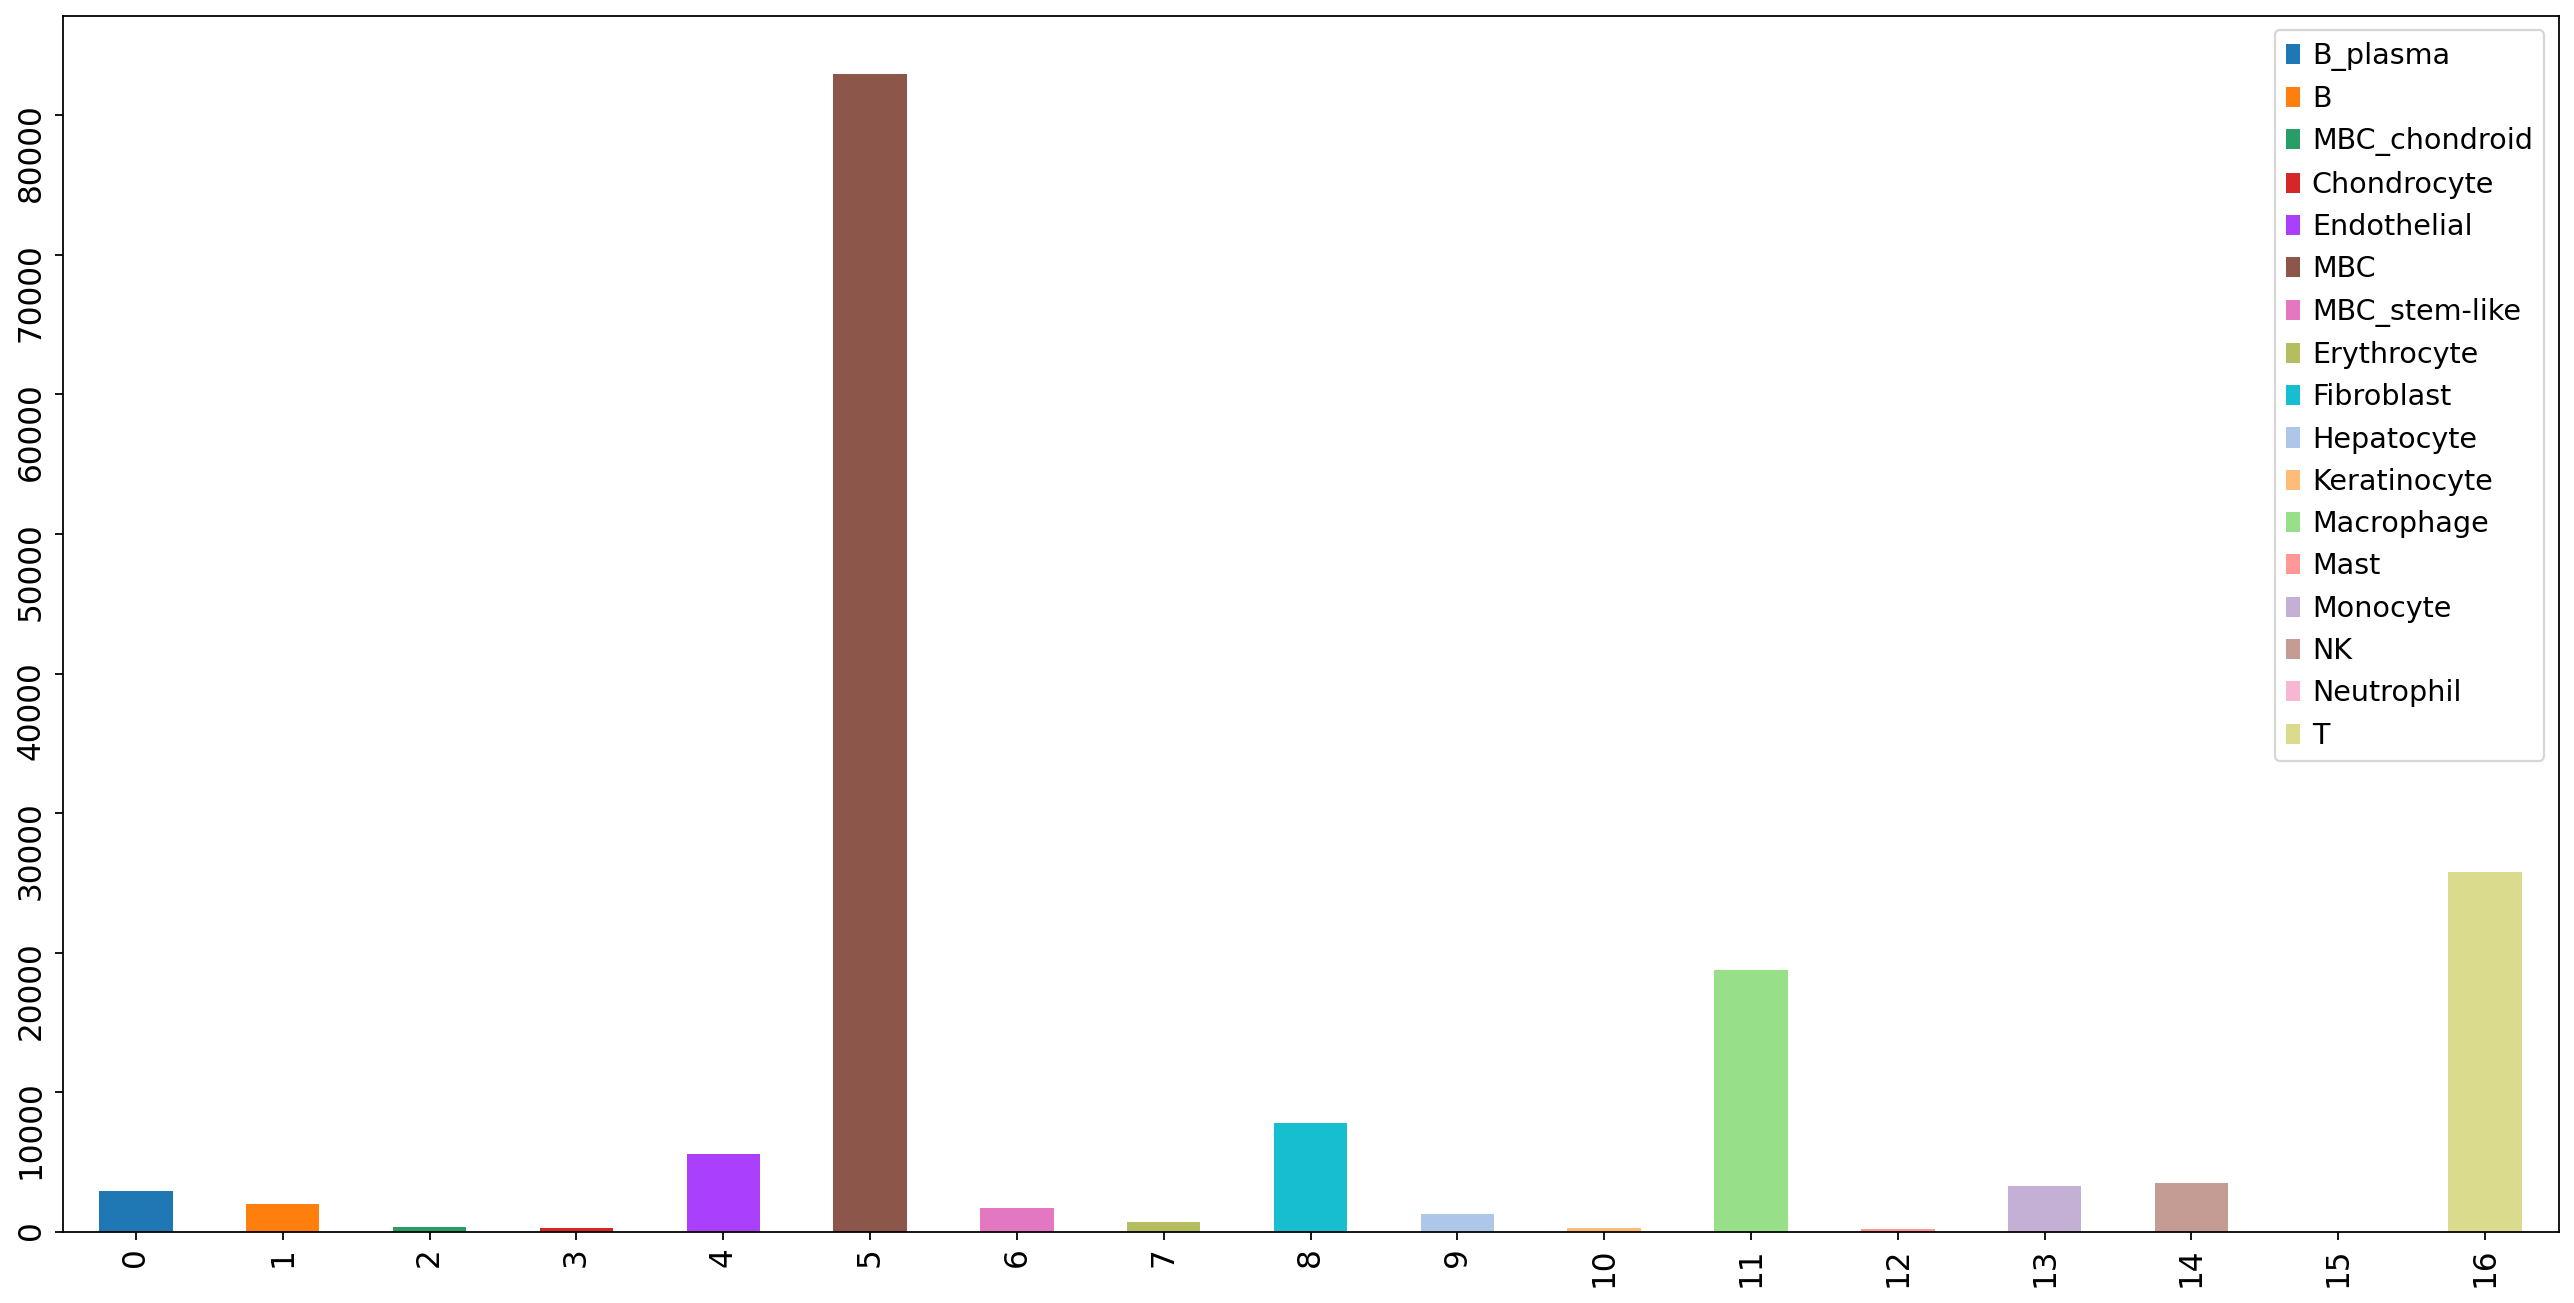

In [ ]:
# plot cell types to select most abundant and suitable cells as reference --> 'T', 'Macrophage', 'Fibroblast', 'Endothelial'

print(adata_fresh.obs["cell_type"].unique().tolist())

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(adata_fresh.obs.groupby(["cell_type"]).size())
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)

['MBC', 'MBC_stem-like', 'MBC_chondroid']
Categories (3, object): ['MBC_chondroid', 'MBC', 'MBC_stem-like']


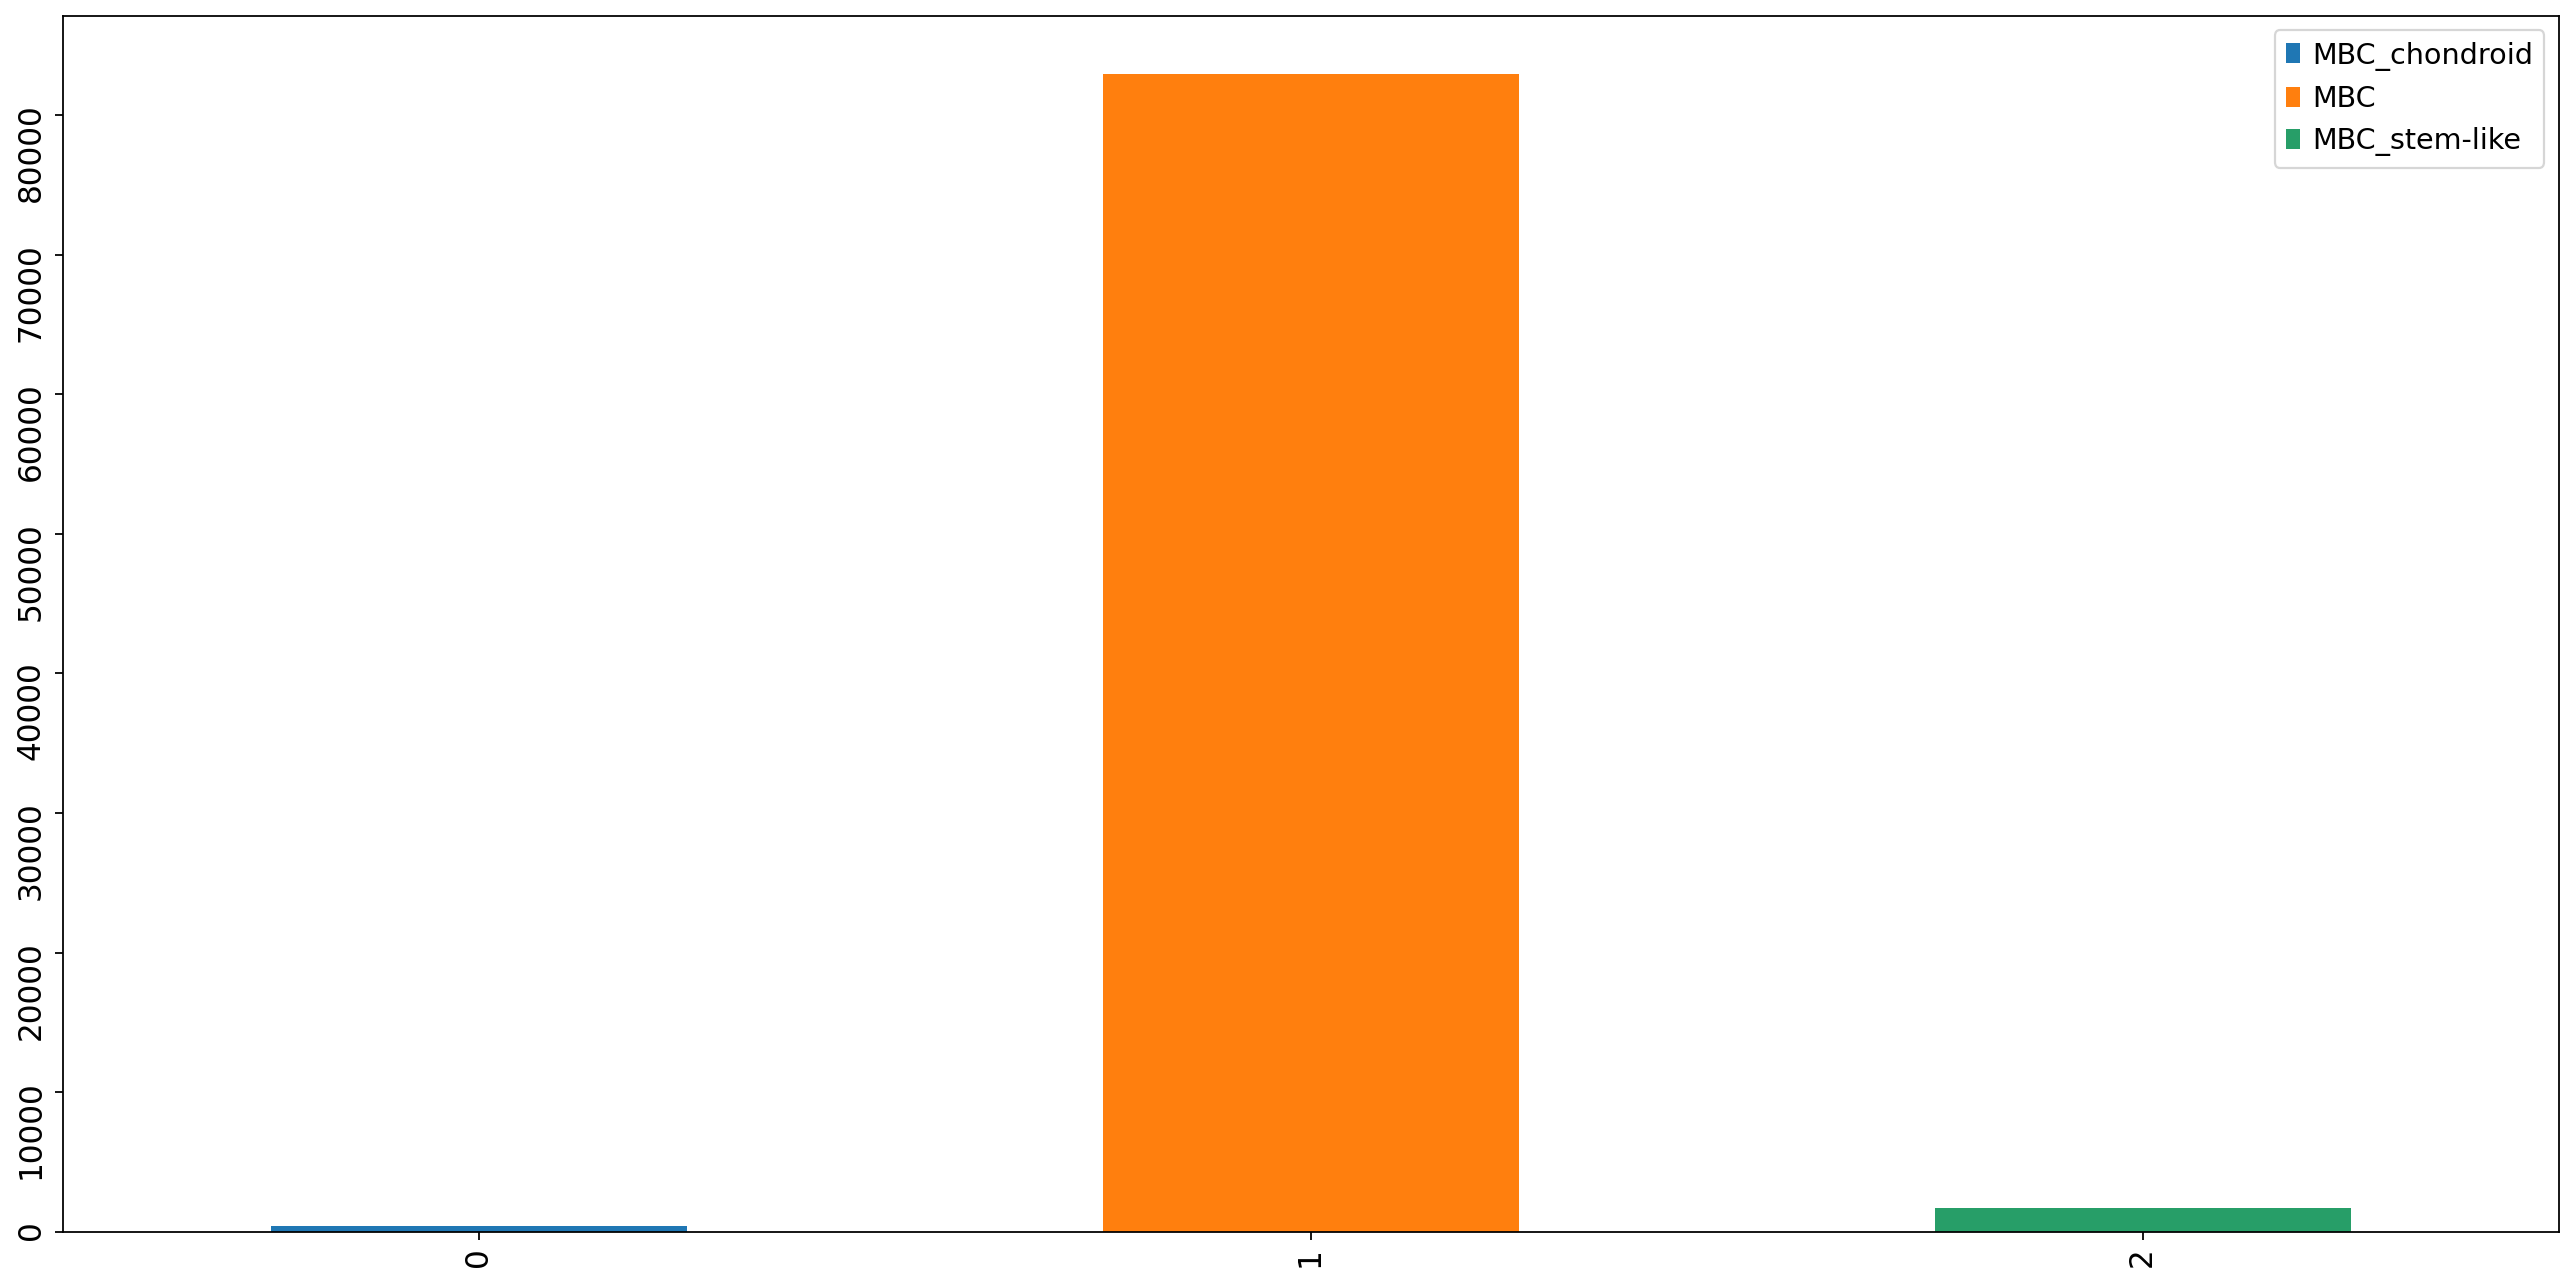

In [ ]:
# plot cell types in "malignant" compartment to filter by cell type correctly later

print(
    adata_fresh[adata_fresh.obs["compartments"] == "Malignant"]
    .obs["cell_type"]
    .unique()
)

cell_numbers = pd.DataFrame(
    adata_fresh[adata_fresh.obs["compartments"] == "Malignant"]
    .obs.groupby(["cell_type"])
    .size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)


In [ ]:
reference_cells_fresh = ["T", "Macrophage", "Fibroblast", "Endothelial"]
hepatocytes_fresh = ["MBC_chondroid", "MBC", "MBC_stem-like"]
selected_cells = reference_cells_fresh + hepatocytes_fresh

['MBC', 'Endothelial', 'Macrophage', 'Fibroblast', 'T', 'MBC_stem-like', 'MBC_chondroid']
Categories (7, object): ['MBC_chondroid', 'Endothelial', 'MBC', 'MBC_stem-like', 'Fibroblast', 'Macrophage', 'T']


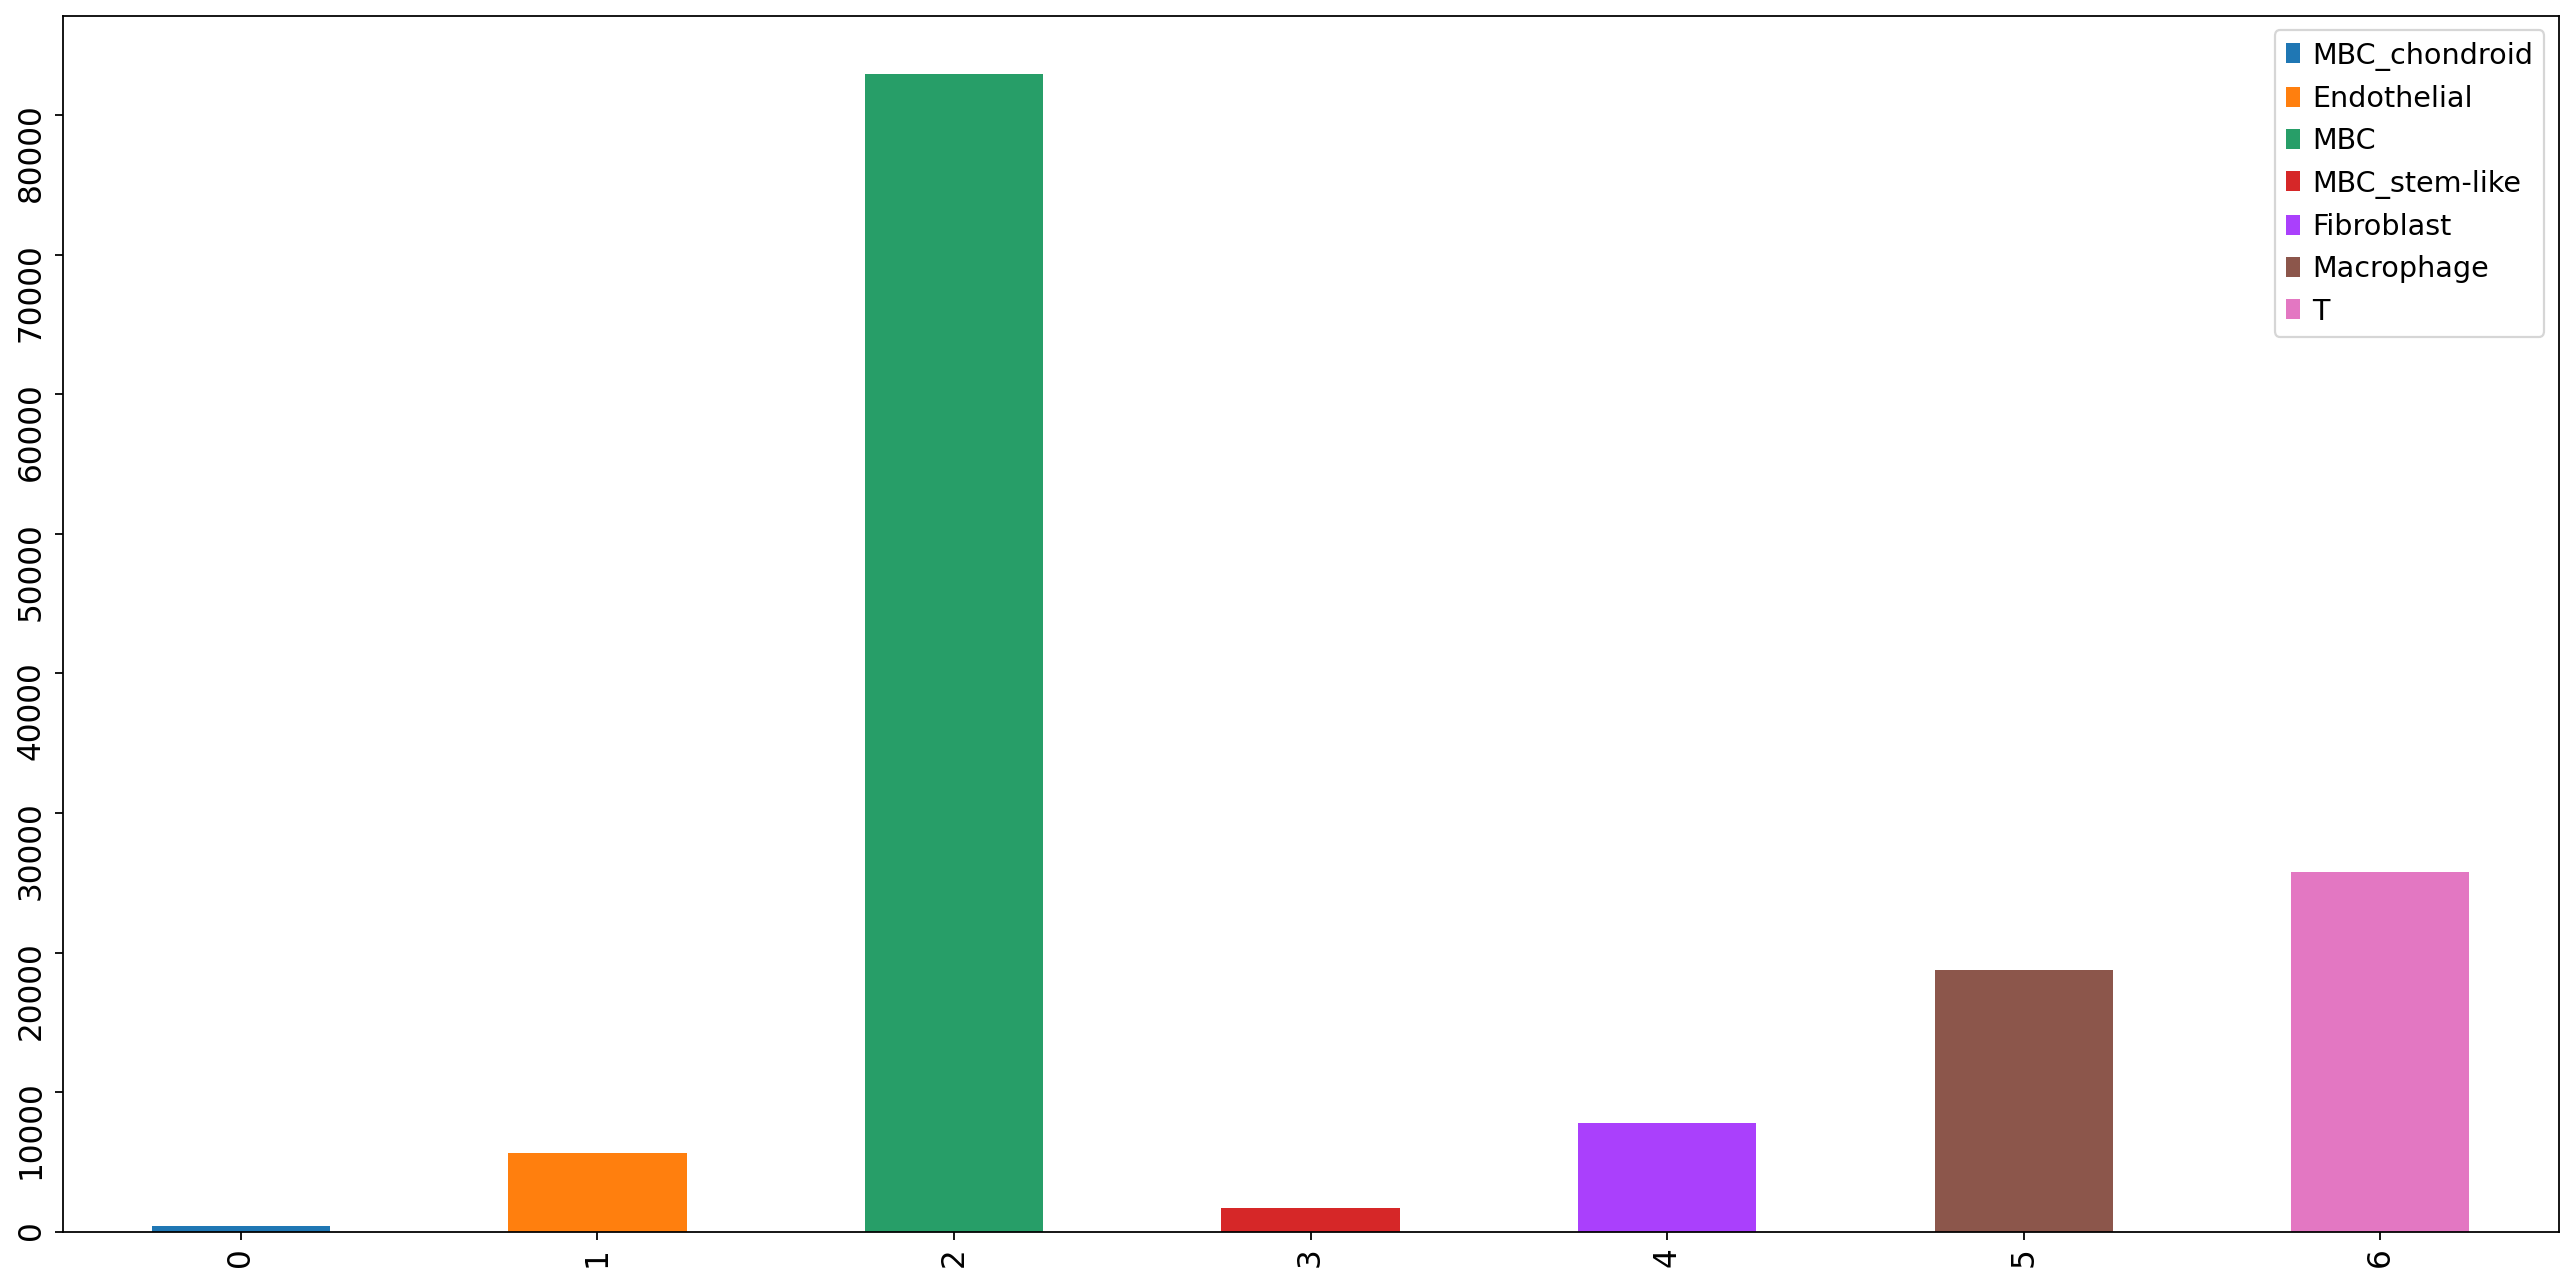

In [ ]:
# plot cell types in "malignant" compartment to filter by cell type correctly later

print(
    adata_fresh[adata_fresh.obs["cell_type"].isin(selected_cells)]
    .obs["cell_type"]
    .unique()
)

cell_numbers = pd.DataFrame(
    adata_fresh[adata_fresh.obs["cell_type"].isin(selected_cells)]
    .obs.groupby(["cell_type"])
    .size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)


In [ ]:
np.random.seed(seed)

####### randomly sample 1000-2000 per cell type from top 4-5 most frequent cell types that are non-malignant and non-hepatocyte and also non-cholangiocytes
pd.DataFrame(adata_fresh.obs.groupby(["cell_type"]).size()).sort_values(
    0, ascending=False
)  # check for highest abundant cell types

# select top abundant reference celltypes
adata_fresh_subsetted_reference_whole = adata_fresh[
    adata_fresh.obs["cell_type"].isin(reference_cells_fresh)
].copy()
adata_fresh_subsetted_reference_whole.obs["index_storage"] = (
    adata_fresh_subsetted_reference_whole.obs.index
)
adata_fresh_subsetted_reference = (
    adata_fresh_subsetted_reference_whole.obs.groupby("cell_type")
    .apply(lambda x: x.sample(2000))
    .reset_index(drop=True)
)
adata_fresh_subsetted_reference.index = adata_fresh_subsetted_reference["index_storage"]
adata_fresh_subsetted_reference_whole.obs = (
    adata_fresh_subsetted_reference_whole.obs.iloc[:, 1:]
)
adata_fresh_subsetted_reference = adata_fresh_subsetted_reference.iloc[:, 1:]
adata_fresh_subsetted_reference_negative = pd.merge(
    adata_fresh_subsetted_reference_whole.obs,
    adata_fresh_subsetted_reference,
    left_index=True,
    right_index=True,
    how="left",
    indicator=True,
).query('_merge=="left_only"')


In [ ]:
# remove cells that are 1.) in adata_fresh_subsetted_reference_negative or that are 2.) not in ['Hepatocytes','Metastasis','Endothelial Cells','Fibroblasts','T Cells','Macrophages','Kupffer Cells']. Also remove cholangiocytes
adata_fresh_for_inferCNV = adata_fresh[
    ~(adata_fresh.obs.index.isin(adata_fresh_subsetted_reference_negative.index))
    & (adata_fresh.obs["cell_type"].isin(selected_cells))
].copy()

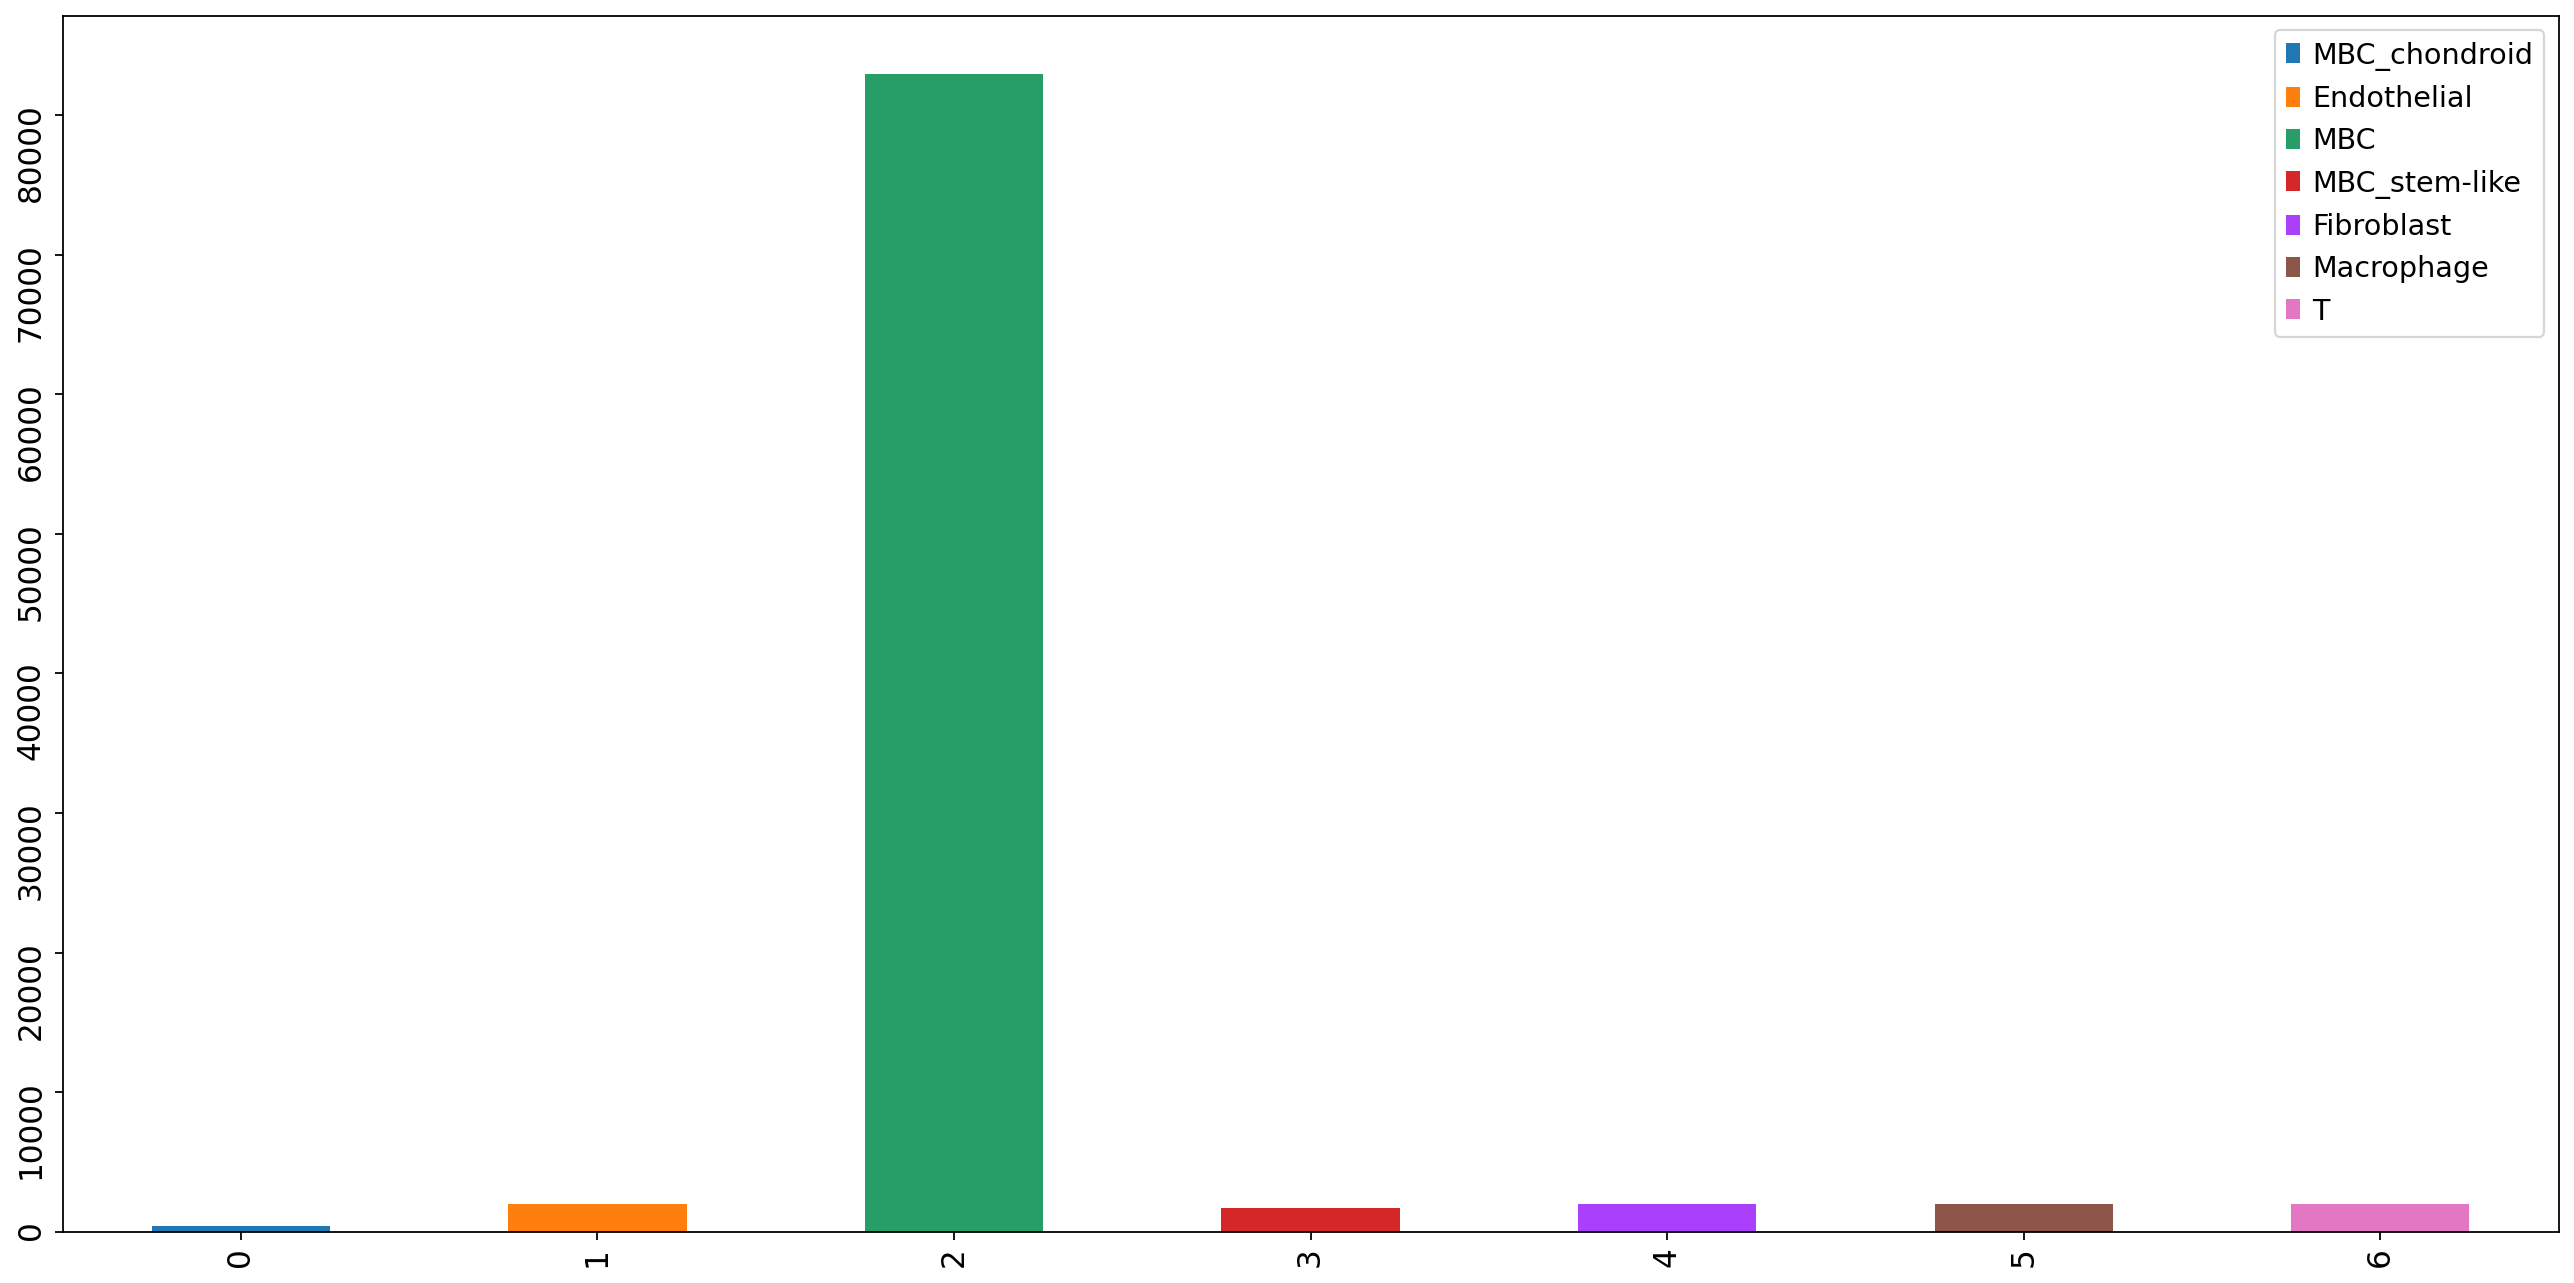

In [ ]:
# plot cell type numbers as sanity check after selecting 2000 random cells from reference cell types

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(adata_fresh_for_inferCNV.obs.groupby(["cell_type"]).size())
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)

In [ ]:
celltype_map = {
    "MBC_chondroid": "MBC",
    "Endothelial": "Endothelial",
    "MBC": "MBC",
    "MBC_stem-like": "MBC",
    "Fibroblast": "Fibroblast",
    "Macrophage": "Macrophage",
    "T": "T",
}

adata_fresh_for_inferCNV.obs["celltype_by_patient"] = adata_fresh_for_inferCNV.obs[
    "cell_type"
].map(celltype_map)

/tmp/ipykernel_2863/3821510192.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata_fresh_for_inferCNV.obs['celltype_by_patient'] = adata_fresh_for_inferCNV.obs['cell_type'].map(celltype_map)


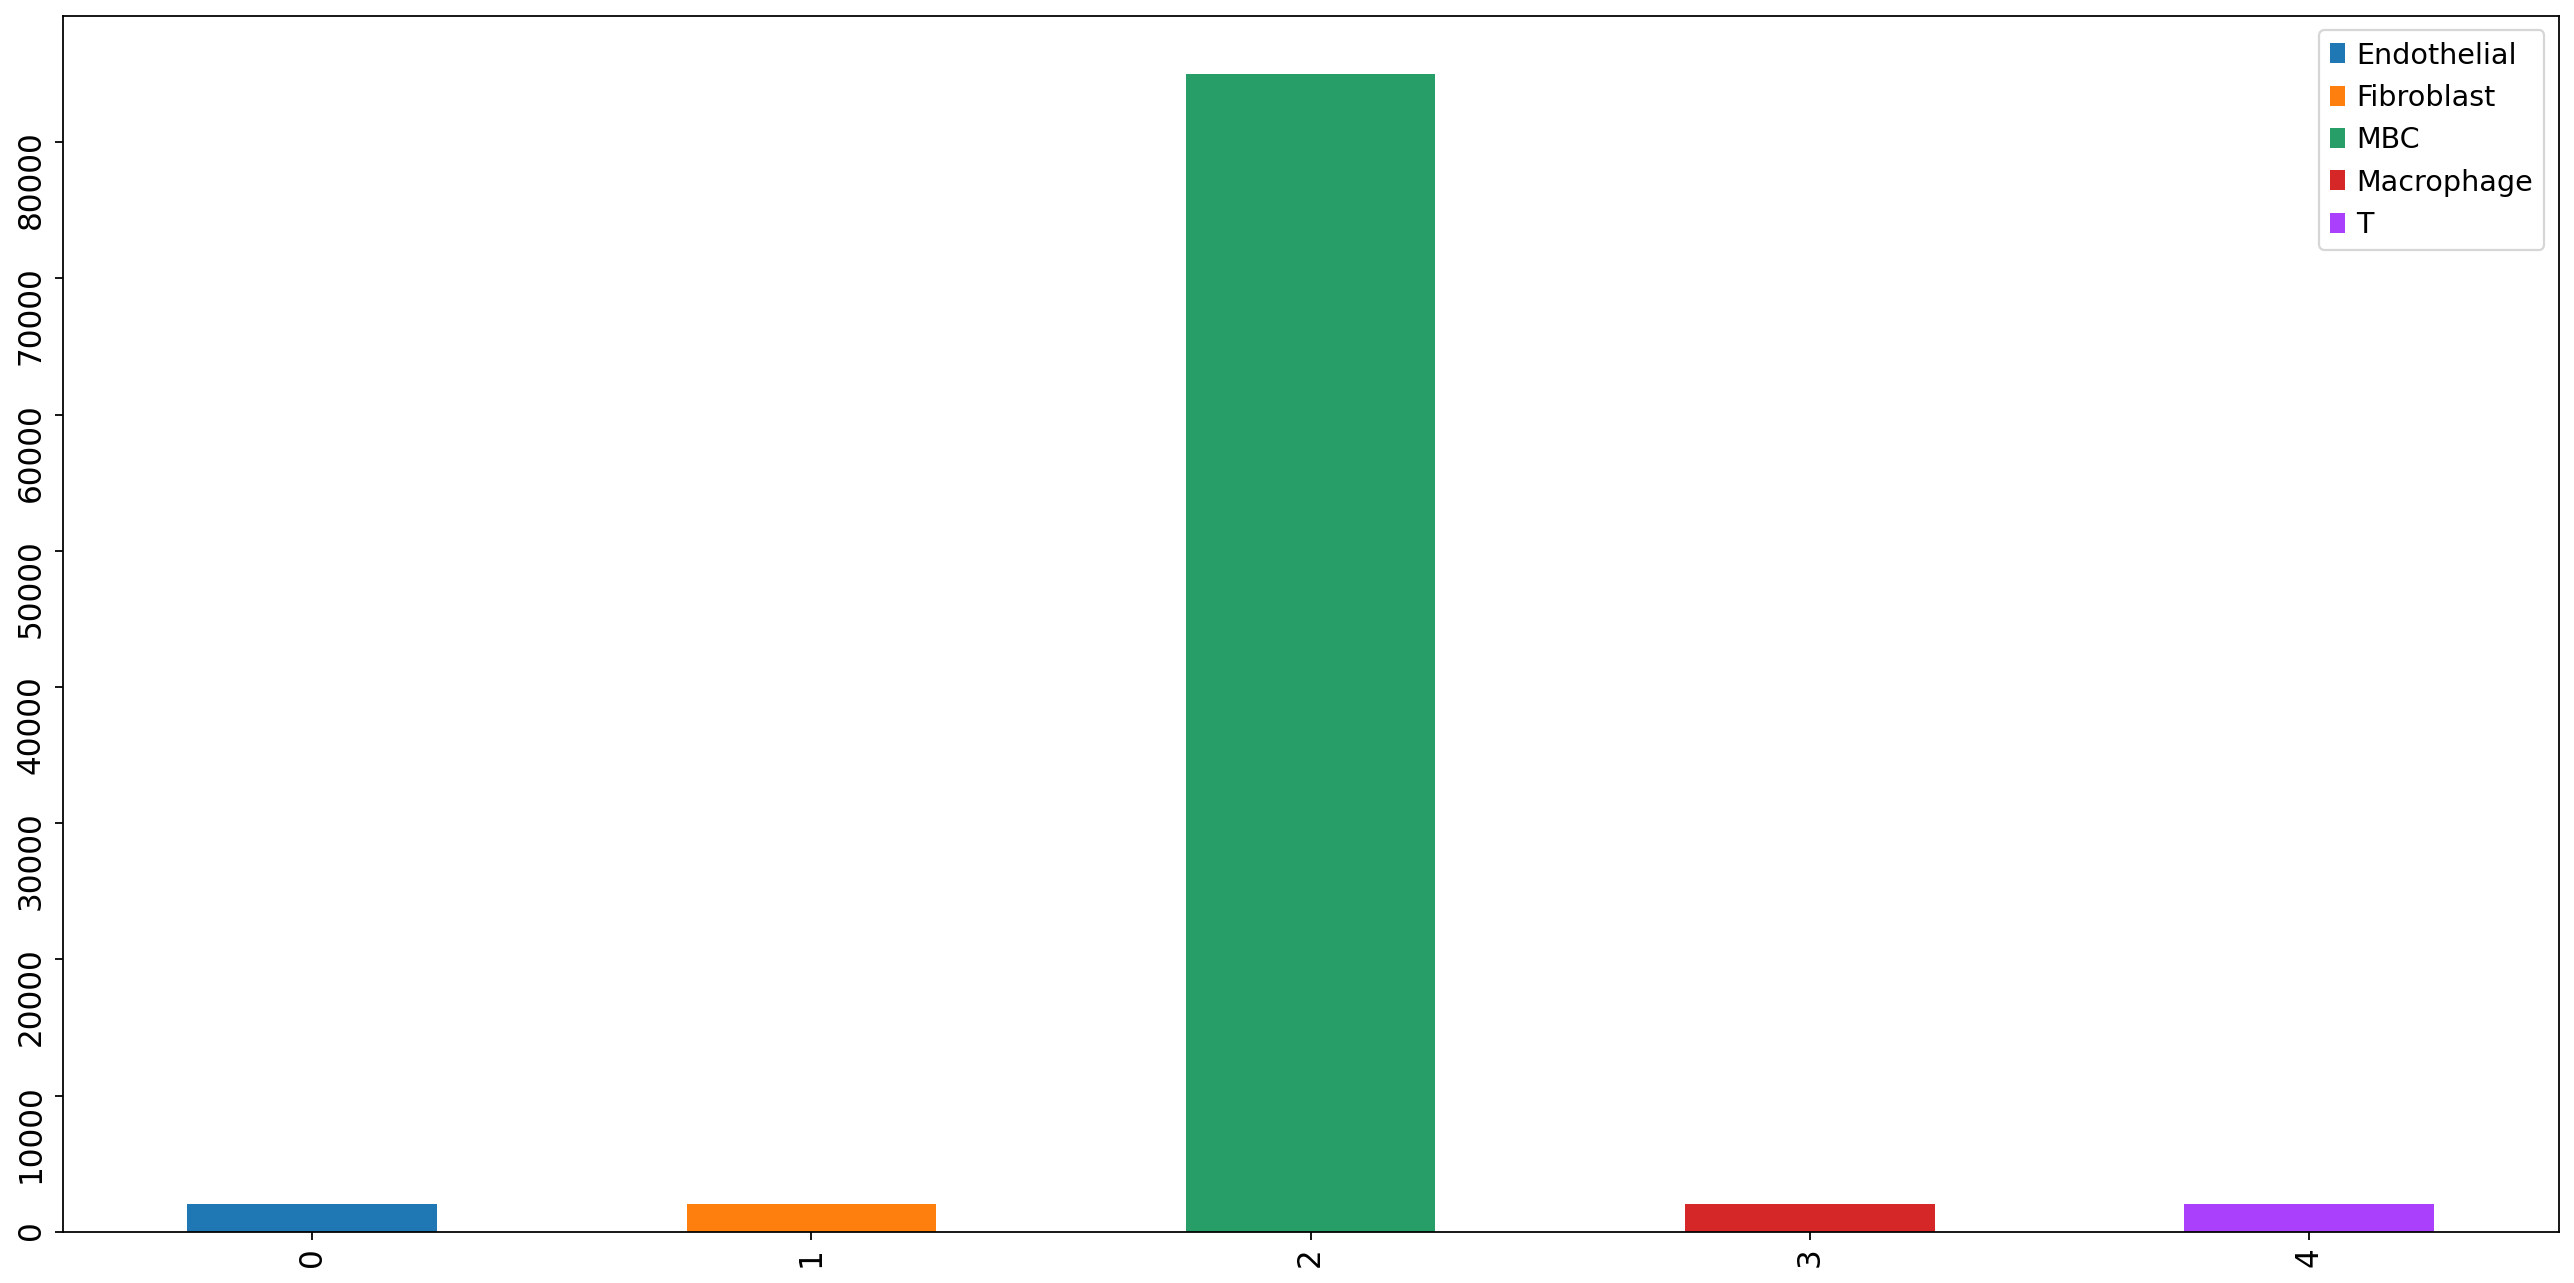

In [ ]:
# plot cell type numbers as sanity check after selecting 2000 random cells from reference cell types

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(
    adata_fresh_for_inferCNV.obs.groupby(["celltype_by_patient"]).size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="celltype_by_patient").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["celltype_by_patient"])
ax.tick_params(labelrotation=90)
ax.grid(False)

In [ ]:
adata_fresh_for_inferCNV.obs.loc[
    adata_fresh_for_inferCNV.obs["celltype_by_patient"] == "MBC", "celltype_by_patient"
] = adata_fresh_for_inferCNV.obs.loc[
    adata_fresh_for_inferCNV.obs["celltype_by_patient"] == "MBC"
][["celltype_by_patient", "name"]].agg("-".join, axis=1)

adata_fresh_for_inferCNV.obs[
    adata_fresh_for_inferCNV.obs["celltype_by_patient"] == "MBC"
]["celltype_by_patient"]
adata_fresh_for_inferCNV.obs["celltype_by_patient"].unique()

array(['MBC-HTAPP-983-SMP-7659', 'Endothelial', 'Macrophage',
       'Fibroblast', 'T', 'MBC-HTAPP-382-SMP-1441',
       'MBC-HTAPP-982-SMP-7629', 'MBC-HTAPP-321-SMP-1021',
       'MBC-HTAPP-285-SMP-751', 'MBC-HTAPP-364-SMP-1321',
       'MBC-HTAPP-414-SMP-1681', 'MBC-HTAPP-423-SMP-1741',
       'MBC-HTAPP-425-SMP-1771', 'MBC-HTAPP-735-SMP-3841',
       'MBC-HTAPP-783-SMP-4081', 'MBC-HTAPP-745-SMP-3961',
       'MBC-HTAPP-851-SMP-4351', 'MBC-HTAPP-853-SMP-4381',
       'MBC-HTAPP-917-SMP-4531', 'MBC-HTAPP-313-SMP-932',
       'MBC-HTAPP-262-SMP-602', 'MBC-HTAPP-330-SMP-1082',
       'MBC-HTAPP-611-SMP-3062', 'MBC-HTAPP-627-SMP-3242',
       'MBC-HTAPP-662-SMP-3602', 'MBC-HTAPP-649-SMP-3422',
       'MBC-HTAPP-908-SMP-4412', 'MBC-HTAPP-586-SMP-8599',
       'MBC-HTAPP-759-SMP-8359', 'MBC-HTAPP-812-SMP-8239'], dtype=object)

In [ ]:
adata_fresh_for_inferCNV = (
    adata_fresh_for_inferCNV.raw.to_adata()
)  # to get .X in same shape as .obsm['counts']

In [ ]:
adata_fresh_for_inferCNV.X = adata_fresh_for_inferCNV.obsm["counts"]

In [ ]:
adata_fresh_for_inferCNV.X = (
    adata_fresh_for_inferCNV.X.toarray()
)  # convert to array so R can read it easily
adata_fresh_for_inferCNV.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
adata_fresh_for_inferCNV

AnnData object with n_obs × n_vars = 93033 × 27629
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_primar

# Add chromosomal location information

In [ ]:
annot = sc.queries.biomart_annotations(
    org="hsapiens",
    attrs=["ensembl_gene_id", "start_position", "end_position", "chromosome_name"],
    host="www.ensembl.org",
)

In [ ]:
annot = annot.astype("str")

In [ ]:
annot.columns = ["ensembl_gene_id", "start", "end", "chromosome"]
annot

,ensembl_gene_id,start,end,chromosome
0,ENSG00000210049,577,647,MT
1,ENSG00000211459,648,1601,MT
2,ENSG00000210077,1602,1670,MT
3,ENSG00000210082,1671,3229,MT
4,ENSG00000209082,3230,3304,MT
...,...,...,...,...
68319,ENSG00000269732,439870,440232,1
68320,ENSG00000284733,450740,451678,1
68321,ENSG00000233653,487101,489906,1
68322,ENSG00000250575,491225,493241,1


In [ ]:
annot = annot[annot["ensembl_gene_id"].isin(adata_fresh_for_inferCNV.var["gene_ids"])]
annot

,ensembl_gene_id,start,end,chromosome
5,ENSG00000198888,3307,4262,MT
9,ENSG00000198763,4470,5511,MT
15,ENSG00000198804,5904,7445,MT
18,ENSG00000198712,7586,8269,MT
20,ENSG00000228253,8366,8572,MT
...,...,...,...,...
68304,ENSG00000143367,151540305,151583583,1
68308,ENSG00000143442,151402724,151459494,1
68310,ENSG00000117676,26529761,26575030,1
68318,ENSG00000236601,358857,366052,1


In [ ]:
adata_fresh_for_inferCNV.var["ensembl_gene_id"] = adata_fresh_for_inferCNV.var[
    "gene_ids"
]

In [ ]:
adata_fresh_for_inferCNV.var = adata_fresh_for_inferCNV.var.merge(
    annot, how="left", on="ensembl_gene_id"
)

In [ ]:
adata_fresh_for_inferCNV.var.loc[:, ["ensembl_gene_id", "start", "end", "chromosome"]]

,ensembl_gene_id,start,end,chromosome
0,ENSG00000238009,89295,133723,1
1,ENSG00000239945,89551,91105,1
2,ENSG00000236601,358857,366052,1
3,ENSG00000235146,587629,594768,1
4,ENSG00000229905,760911,761989,1
...,...,...,...,...
27624,ENSG00000278633,10598,13001,KI270731.1
27625,ENSG00000276345,2585,11802,KI270721.1
27626,ENSG00000277856,26241,26534,KI270726.1
27627,ENSG00000275063,41444,41876,KI270726.1


In [30]:
adata_fresh_for_inferCNV.var.index = adata_fresh_for_inferCNV.var.index.astype(str)

In [ ]:
adata_fresh_for_inferCNV.var["chromosome"] = [
    "chr" + str(i) for i in adata_fresh_for_inferCNV.var["chromosome"]
]
adata_fresh_for_inferCNV.var["chromosome"]
adata_fresh_for_inferCNV.var["chromosome"].unique()

array(['chr1', 'chrnan', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',
       'chrX', 'chr8', 'chr9', 'chr11', 'chr10', 'chr12', 'chr13',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chr19',
       'chrY', 'chr22', 'chr21', 'chrMT', 'chrKI270728.1',
       'chrGL000009.2', 'chrGL000194.1', 'chrGL000195.1', 'chrGL000219.1',
       'chrKI270734.1', 'chrGL000218.1', 'chrKI270731.1', 'chrKI270721.1',
       'chrKI270726.1', 'chrKI270711.1'], dtype=object)

In [ ]:
adata_fresh_for_inferCNV.var["start"] = adata_fresh_for_inferCNV.var["start"].fillna(
    "0"
)
adata_fresh_for_inferCNV.var["end"] = adata_fresh_for_inferCNV.var["end"].fillna("0")

In [ ]:
adata_fresh_for_inferCNV.var[adata_fresh_for_inferCNV.var["chromosome"] == "chrnan"]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ensembl_gene_id,start,end,chromosome
210,ENSG00000277726,7,False,7,0.000042,99.995809,7.0,ENSG00000277726,0,0,chrnan
212,ENSG00000271895,250,False,250,0.001563,99.850318,261.0,ENSG00000271895,0,0,chrnan
235,ENSG00000242349,519,False,519,0.003113,99.689261,520.0,ENSG00000242349,0,0,chrnan
349,ENSG00000225986,4745,False,4745,0.028481,97.159040,4757.0,ENSG00000225986,0,0,chrnan
380,ENSG00000271840,69,False,69,0.000419,99.958688,70.0,ENSG00000271840,0,0,chrnan
...,...,...,...,...,...,...,...,...,...,...,...
27168,ENSG00000230345,4,False,4,0.000024,99.997605,4.0,ENSG00000230345,0,0,chrnan
27212,ENSG00000130489,27,False,27,0.000162,99.983834,27.0,ENSG00000130489,0,0,chrnan
27277,ENSG00000226751,42,False,42,0.000257,99.974853,43.0,ENSG00000226751,0,0,chrnan
27545,ENSG00000277352,16,False,16,0.000096,99.990420,16.0,ENSG00000277352,0,0,chrnan


In [ ]:
adata_fresh_for_inferCNV.var[
    adata_fresh_for_inferCNV.var["chromosome"].isin(
        [
            "chrGL000009.2",
            "chrGL000194.1",
            "chrGL000195.1",
            "chrGL000213.1",
            "chrGL000218.1",
            "chrGL000219.1",
            "chrKI270711.1",
            "chrKI270713.1",
            "chrKI270721.1",
            "chrKI270726.1",
            "chrKI270727.1",
            "chrKI270728.1",
            "chrKI270731.1",
            "chrKI270734.1",
            "chrnan",
            "chrMT",
            "chrY",
        ]
    )
]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ensembl_gene_id,start,end,chromosome
210,ENSG00000277726,7,False,7,0.000042,99.995809,7.0,ENSG00000277726,0,0,chrnan
212,ENSG00000271895,250,False,250,0.001563,99.850318,261.0,ENSG00000271895,0,0,chrnan
235,ENSG00000242349,519,False,519,0.003113,99.689261,520.0,ENSG00000242349,0,0,chrnan
349,ENSG00000225986,4745,False,4745,0.028481,97.159040,4757.0,ENSG00000225986,0,0,chrnan
380,ENSG00000271840,69,False,69,0.000419,99.958688,70.0,ENSG00000271840,0,0,chrnan
...,...,...,...,...,...,...,...,...,...,...,...
27624,ENSG00000278633,20,False,20,0.000120,99.988025,20.0,ENSG00000278633,10598,13001,chrKI270731.1
27625,ENSG00000276345,2921,False,2921,0.017543,98.251118,2930.0,ENSG00000276345,2585,11802,chrKI270721.1
27626,ENSG00000277856,26,False,26,0.000245,99.984433,41.0,ENSG00000277856,26241,26534,chrKI270726.1
27627,ENSG00000275063,58,False,58,0.000347,99.965274,58.0,ENSG00000275063,41444,41876,chrKI270726.1


In [35]:
adata_fresh_for_inferCNV

AnnData object with n_obs × n_vars = 93033 × 27629
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_primar

In [ ]:
adata_fresh_for_inferCNV.var["chromosome"].unique()

array(['chr1', 'chrnan', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',
       'chrX', 'chr8', 'chr9', 'chr11', 'chr10', 'chr12', 'chr13',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chr19',
       'chrY', 'chr22', 'chr21', 'chrMT', 'chrKI270728.1',
       'chrGL000009.2', 'chrGL000194.1', 'chrGL000195.1', 'chrGL000219.1',
       'chrKI270734.1', 'chrGL000218.1', 'chrKI270731.1', 'chrKI270721.1',
       'chrKI270726.1', 'chrKI270711.1'], dtype=object)

In [ ]:
adata_fresh_for_inferCNV.X[0:5, 0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

# Saving data

In [ ]:
adata_fresh_for_inferCNV.write("fresh_selected_for_inferCNV.h5ad")

# 02 Process frozen samples

# Creating subset of data

In [ ]:
adata_frozen = sc.read("frozen_TST_selected.h5ad")

In [42]:
adata_frozen

AnnData object with n_obs × n_vars = 394534 × 2653
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_primar

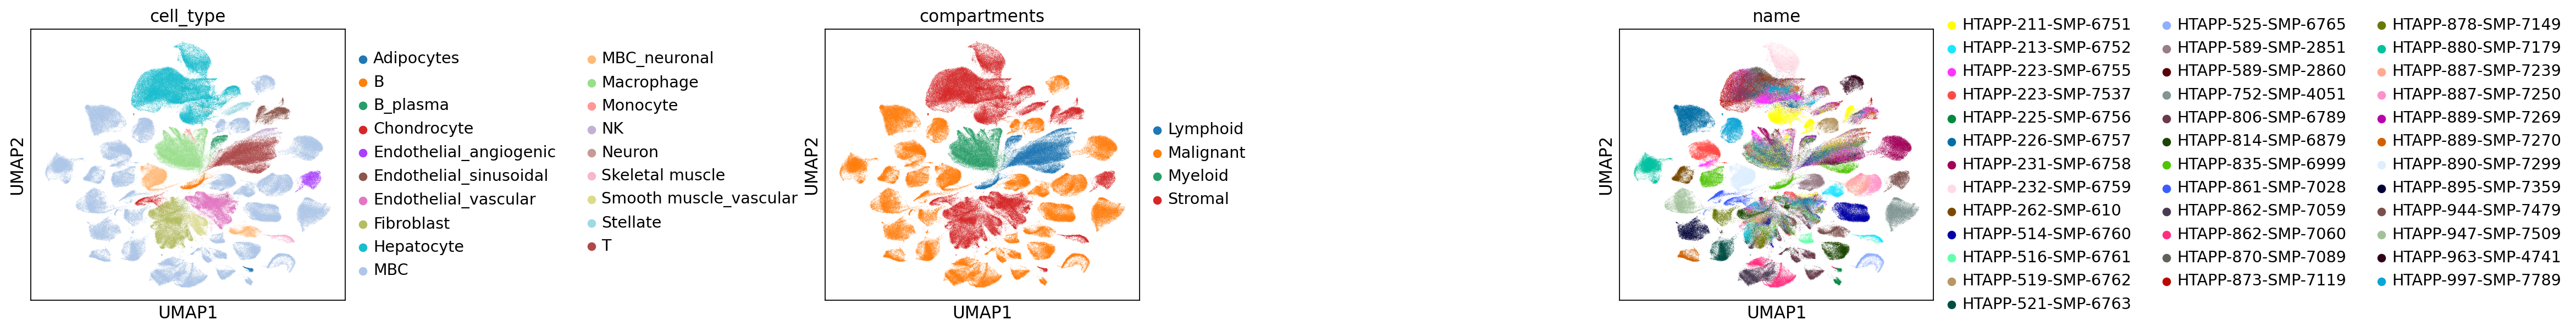

In [ ]:
sc.pl.umap(adata_frozen, color=["cell_type", "compartments", "name"], wspace=1.3)

['MBC', 'Endothelial_vascular', 'Adipocytes', 'Fibroblast', 'T', 'B_plasma', 'Macrophage', 'Smooth muscle_vascular', 'NK', 'Endothelial_sinusoidal', 'Hepatocyte', 'Stellate', 'Monocyte', 'B', 'Chondrocyte', 'MBC_neuronal', 'Endothelial_angiogenic', 'Skeletal muscle', 'Neuron']


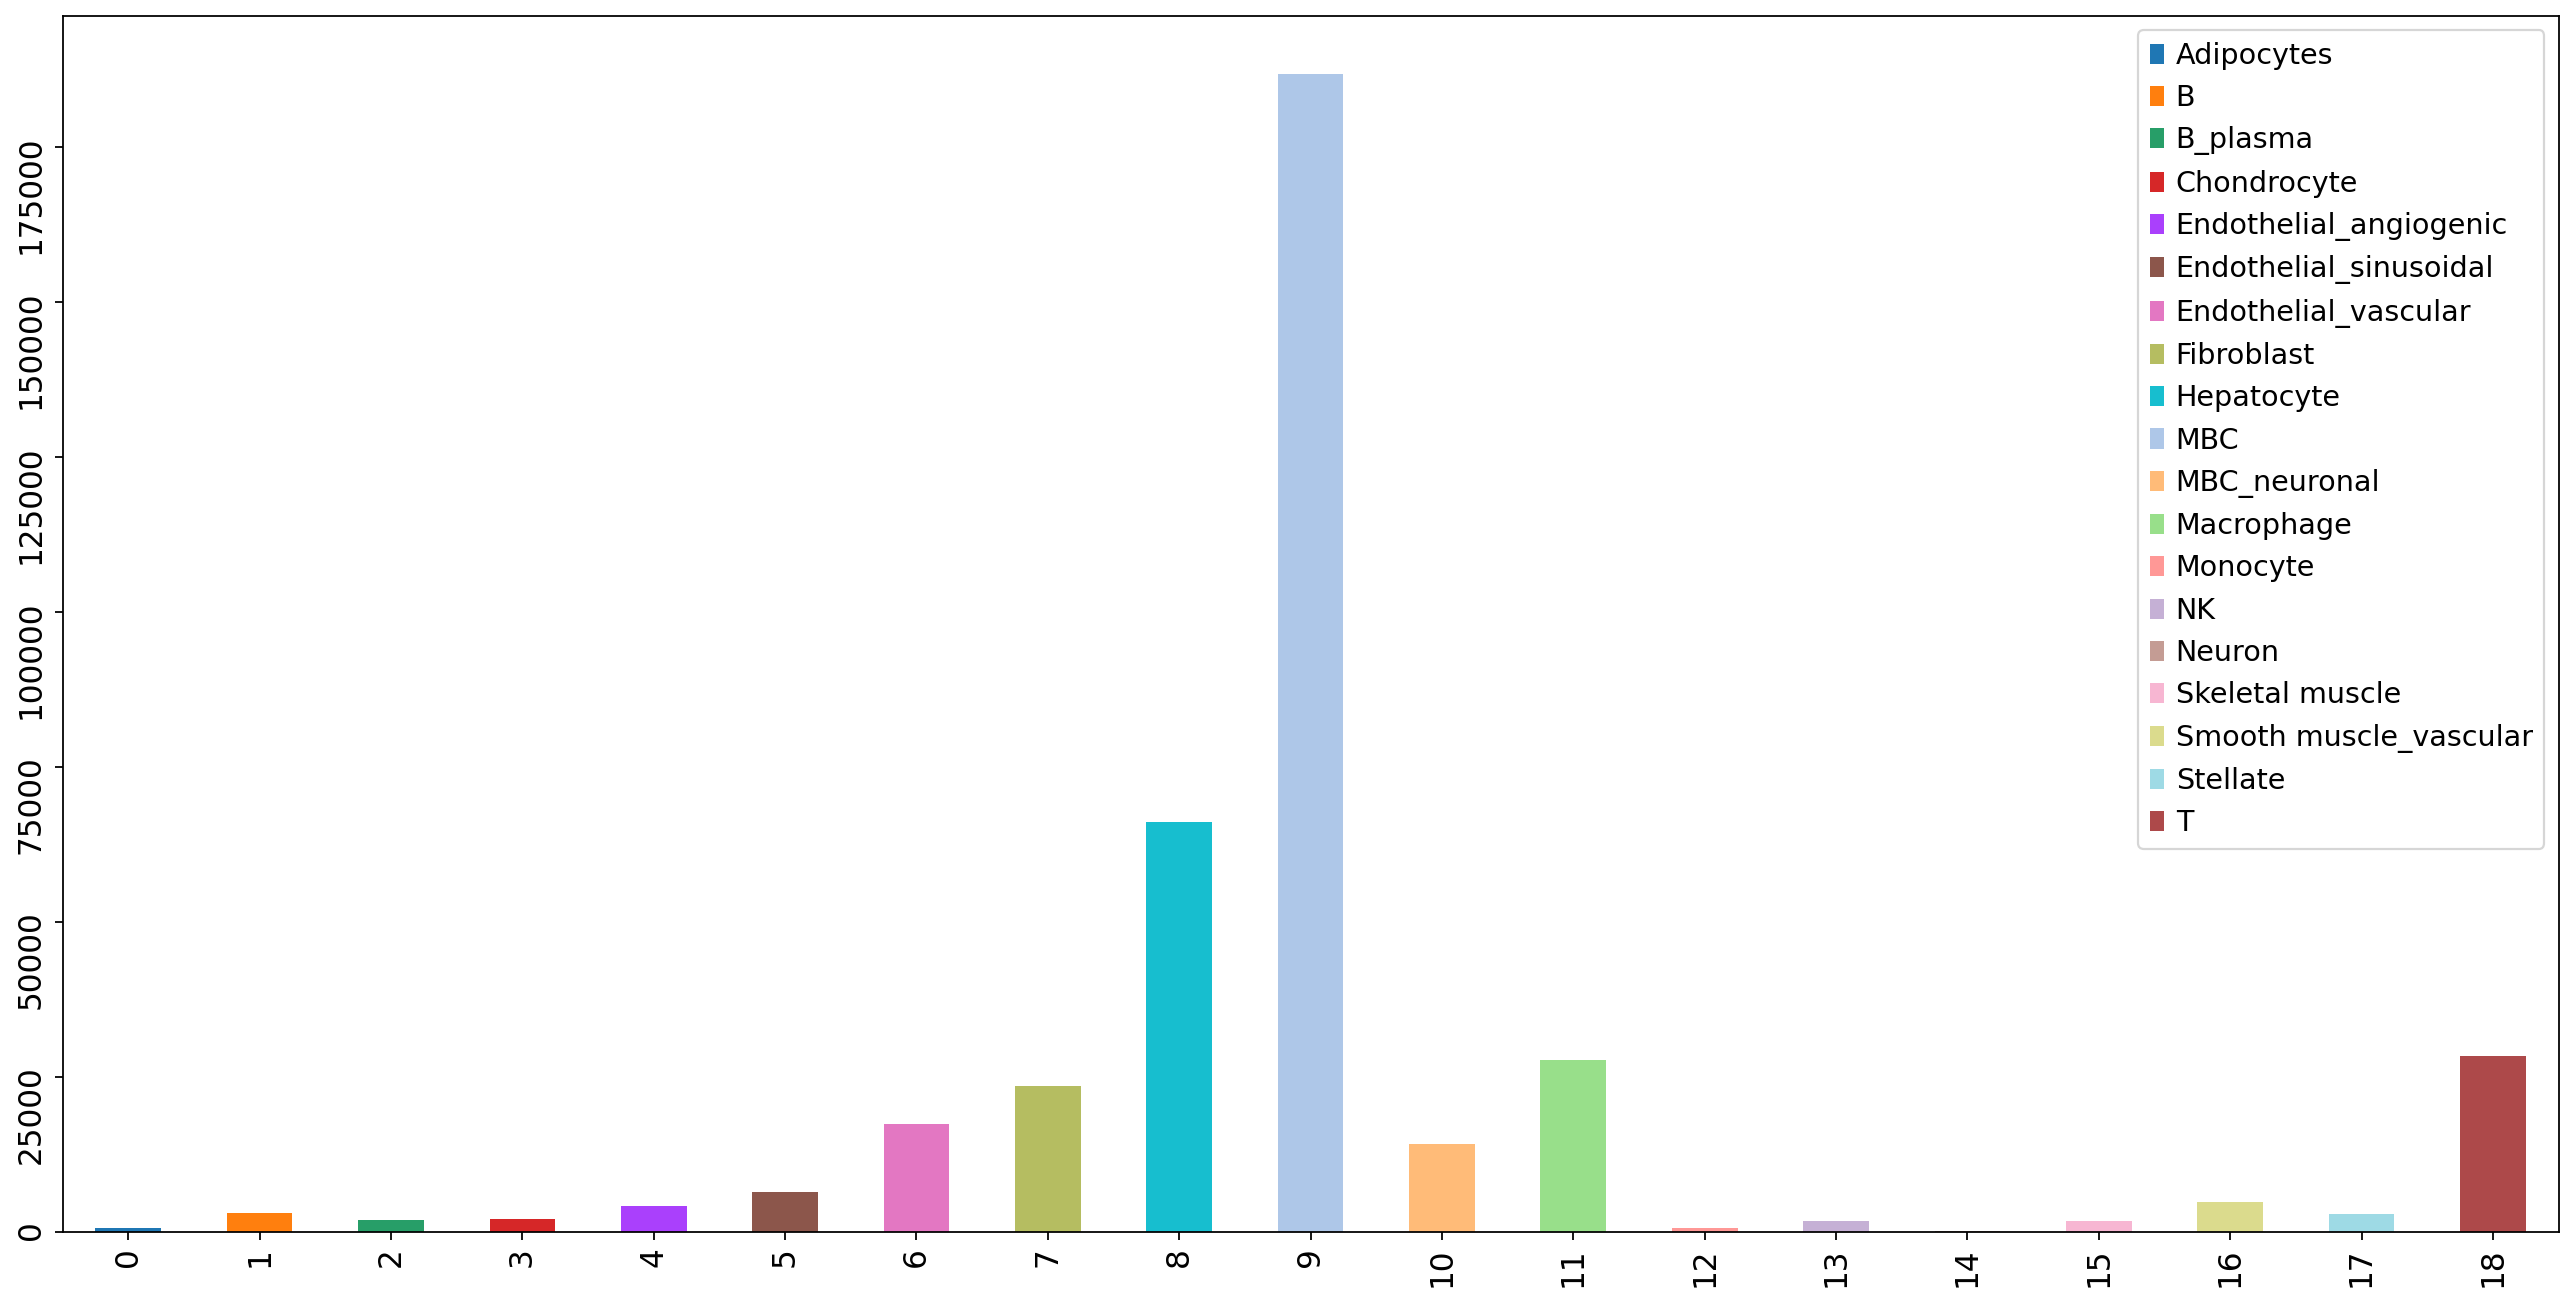

In [ ]:
# plot cell types to select most abundant and suitable cells as reference --> 'T', 'Macrophage', 'Fibroblast', 'Endothelial_sinusoidal', 'B_plasma'

print(adata_frozen.obs["cell_type"].unique().tolist())

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(adata_frozen.obs.groupby(["cell_type"]).size())
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)

['MBC', 'MBC_neuronal']
Categories (2, object): ['MBC', 'MBC_neuronal']


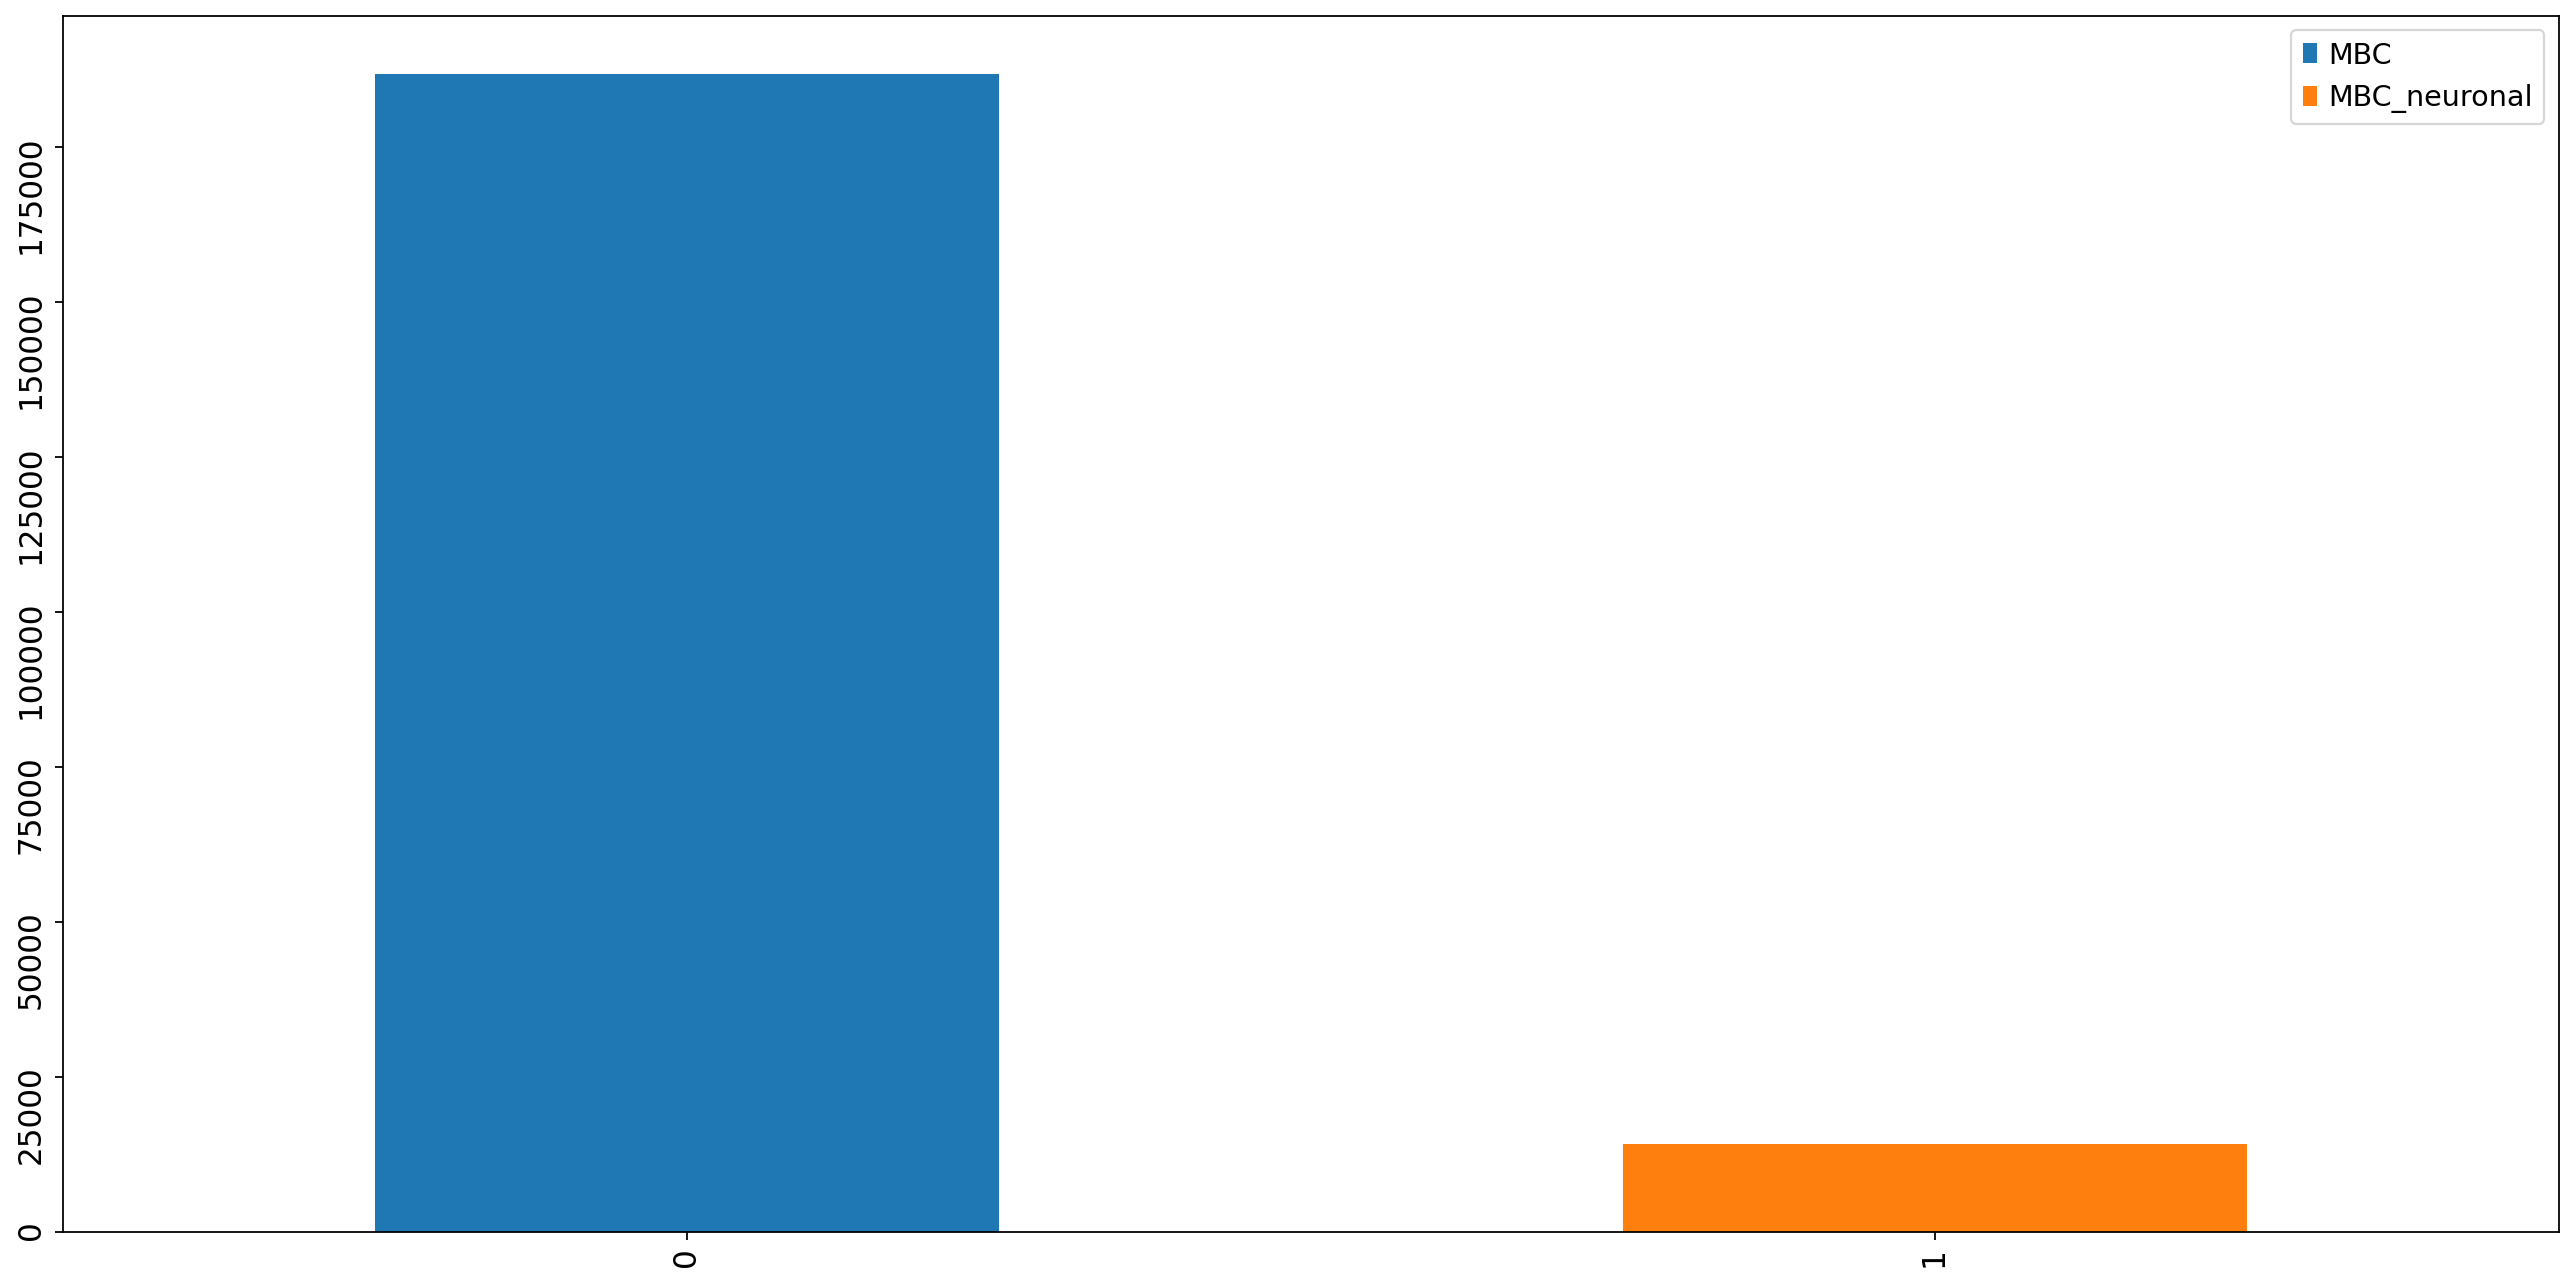

In [ ]:
# plot cell types in "malignant" compartment to filter by cell type correctly later

print(
    adata_frozen[adata_frozen.obs["compartments"] == "Malignant"]
    .obs["cell_type"]
    .unique()
)

cell_numbers = pd.DataFrame(
    adata_frozen[adata_frozen.obs["compartments"] == "Malignant"]
    .obs.groupby(["cell_type"])
    .size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)


In [ ]:
reference_cells_frozen = ["T", "Macrophage", "Fibroblast", "Endothelial_sinusoidal"]
malignant_cells_frozen = ["MBC", "MBC_neuronal"]
selected_cells = reference_cells_frozen + malignant_cells_frozen

['MBC', 'Fibroblast', 'T', 'Macrophage', 'Endothelial_sinusoidal', 'MBC_neuronal']
Categories (6, object): ['Endothelial_sinusoidal', 'Fibroblast', 'MBC', 'MBC_neuronal', 'Macrophage', 'T']


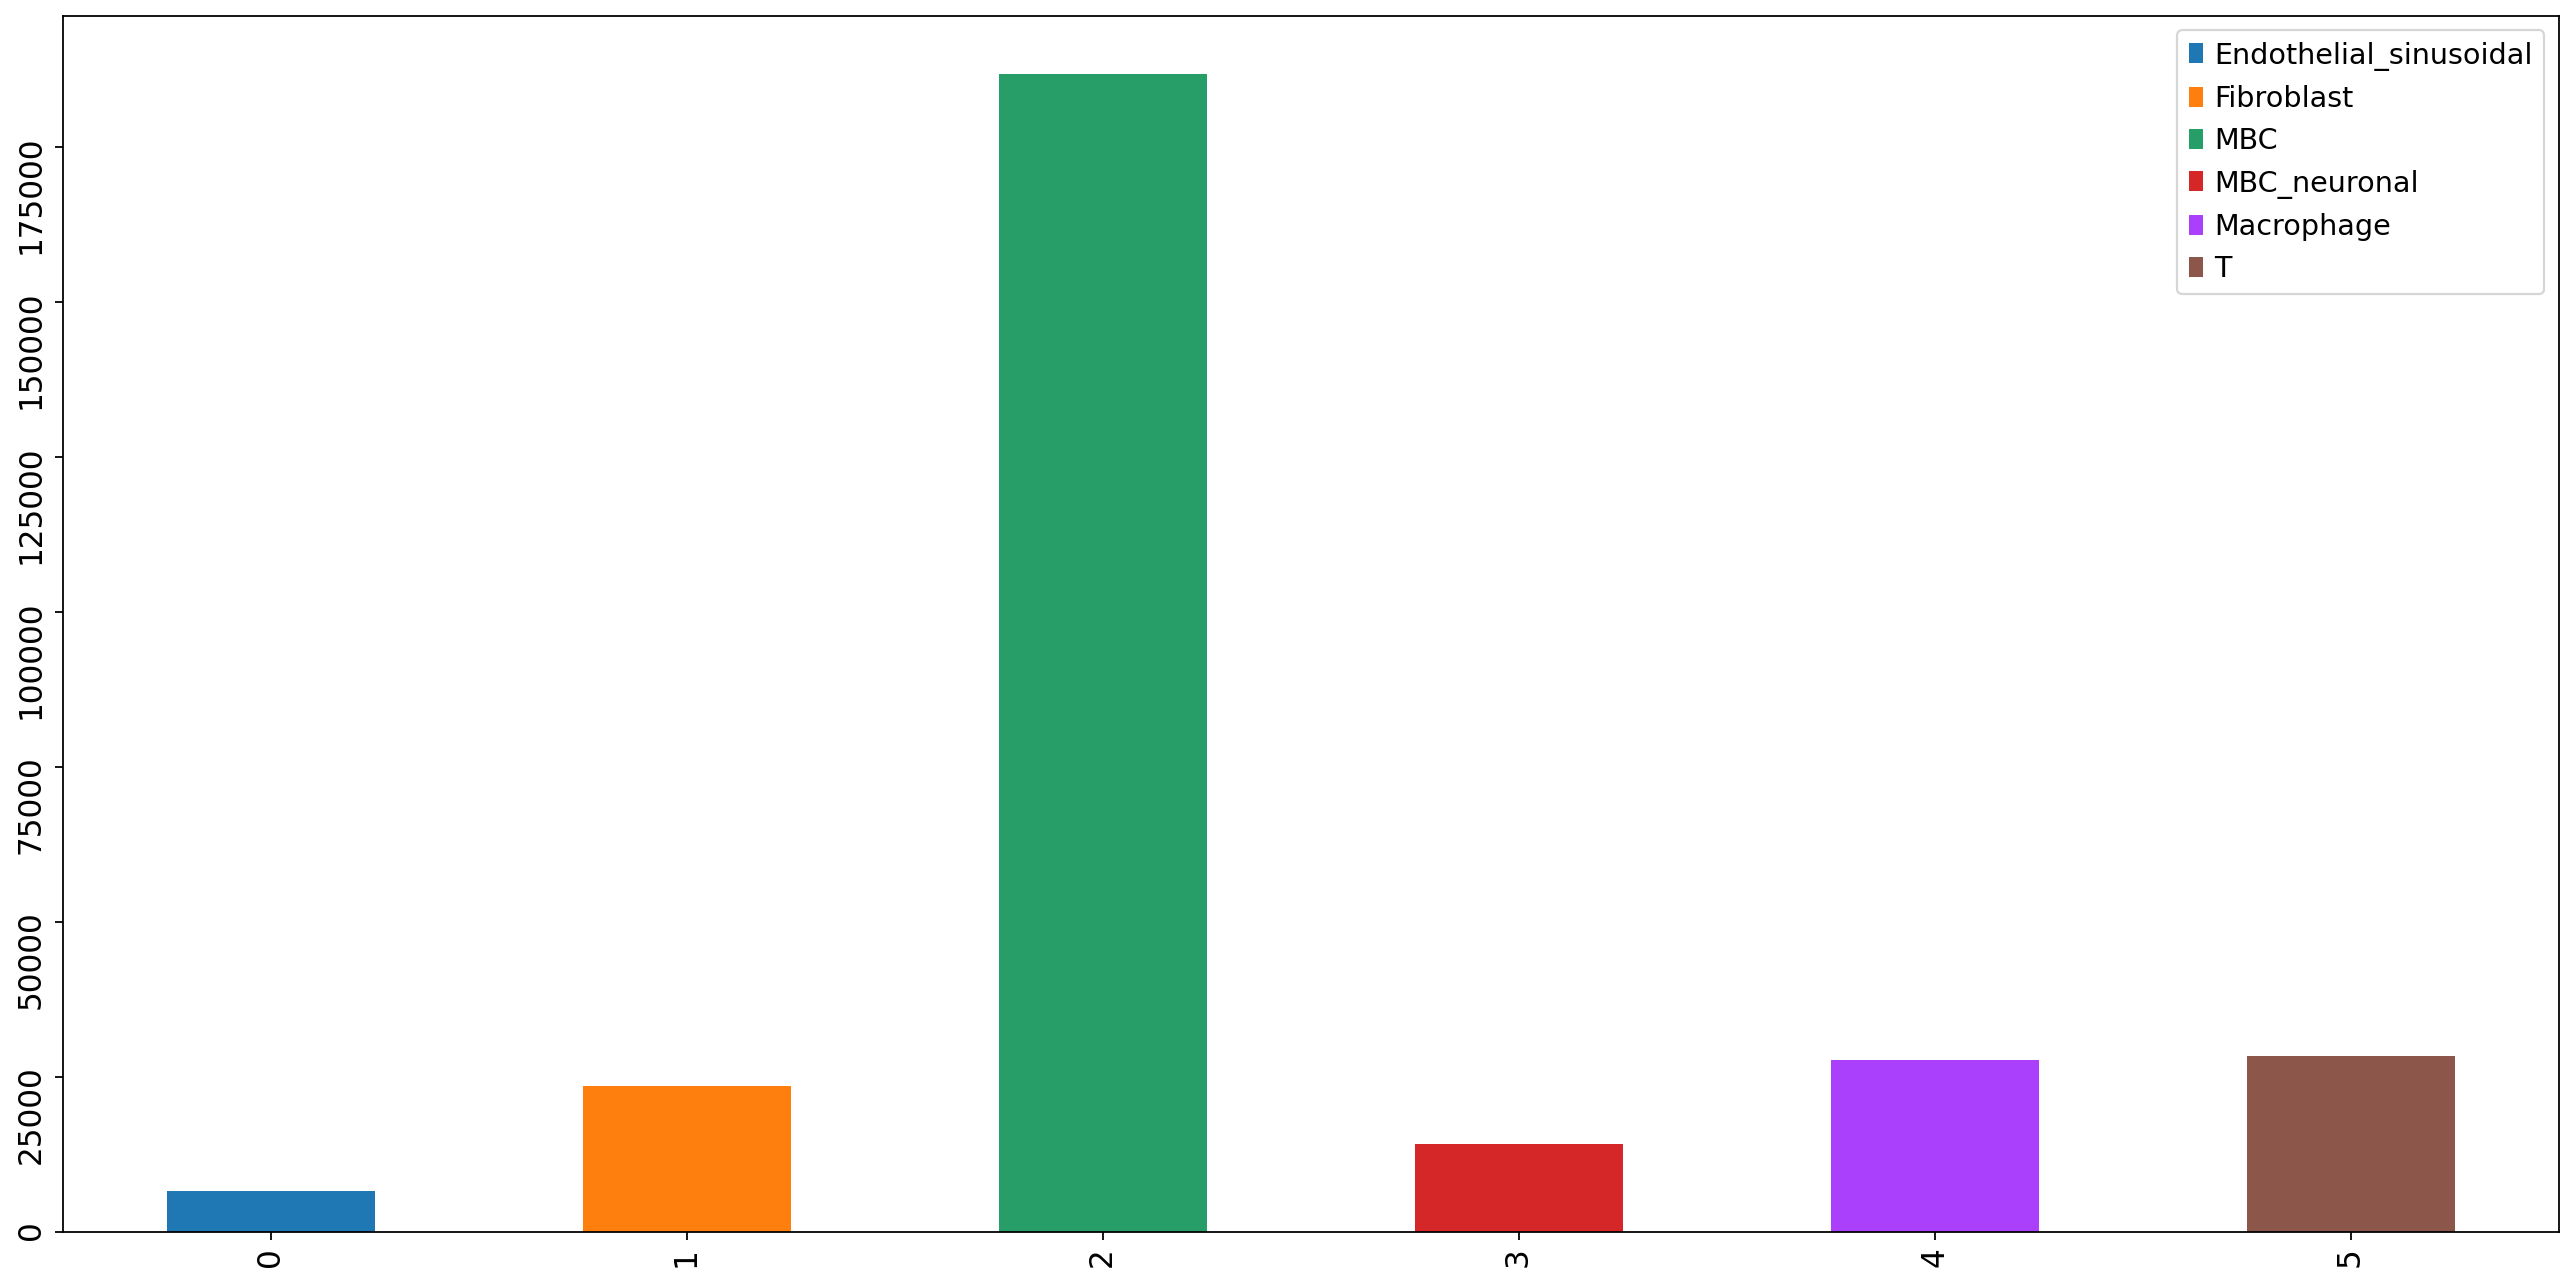

In [ ]:
# plot cell types in "malignant" compartment to filter by cell type correctly later

print(
    adata_frozen[adata_frozen.obs["cell_type"].isin(selected_cells)]
    .obs["cell_type"]
    .unique()
)

cell_numbers = pd.DataFrame(
    adata_frozen[adata_frozen.obs["cell_type"].isin(selected_cells)]
    .obs.groupby(["cell_type"])
    .size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)


In [ ]:
np.random.seed(seed)

####### randomly sample 1000-2000 per cell type from top 4-5 most frequent cell types that are non-malignant and non-hepatocyte and also non-cholangiocytes
pd.DataFrame(adata_frozen.obs.groupby(["cell_type"]).size()).sort_values(
    0, ascending=False
)  # check for highest abundant cell types

# select top abundant reference celltypes
adata_frozen_subsetted_reference_whole = adata_frozen[
    adata_frozen.obs["cell_type"].isin(reference_cells_frozen)
].copy()
adata_frozen_subsetted_reference_whole.obs["index_storage"] = (
    adata_frozen_subsetted_reference_whole.obs.index
)
adata_frozen_subsetted_reference = (
    adata_frozen_subsetted_reference_whole.obs.groupby("cell_type")
    .apply(lambda x: x.sample(2000))
    .reset_index(drop=True)
)
adata_frozen_subsetted_reference.index = adata_frozen_subsetted_reference[
    "index_storage"
]
adata_frozen_subsetted_reference_whole.obs = (
    adata_frozen_subsetted_reference_whole.obs.iloc[:, 1:]
)
adata_frozen_subsetted_reference = adata_frozen_subsetted_reference.iloc[:, 1:]
adata_frozen_subsetted_reference_negative = pd.merge(
    adata_frozen_subsetted_reference_whole.obs,
    adata_frozen_subsetted_reference,
    left_index=True,
    right_index=True,
    how="left",
    indicator=True,
).query('_merge=="left_only"')


In [ ]:
# remove cells that are 1.) in adata_frozen_subsetted_reference_negative or that are 2.) not in ['Hepatocytes','Metastasis','Endothelial Cells','Fibroblasts','T Cells','Macrophages','Kupffer Cells']. Also remove cholangiocytes
adata_frozen_for_inferCNV = adata_frozen[
    ~(adata_frozen.obs.index.isin(adata_frozen_subsetted_reference_negative.index))
    & (adata_frozen.obs["cell_type"].isin(selected_cells))
].copy()

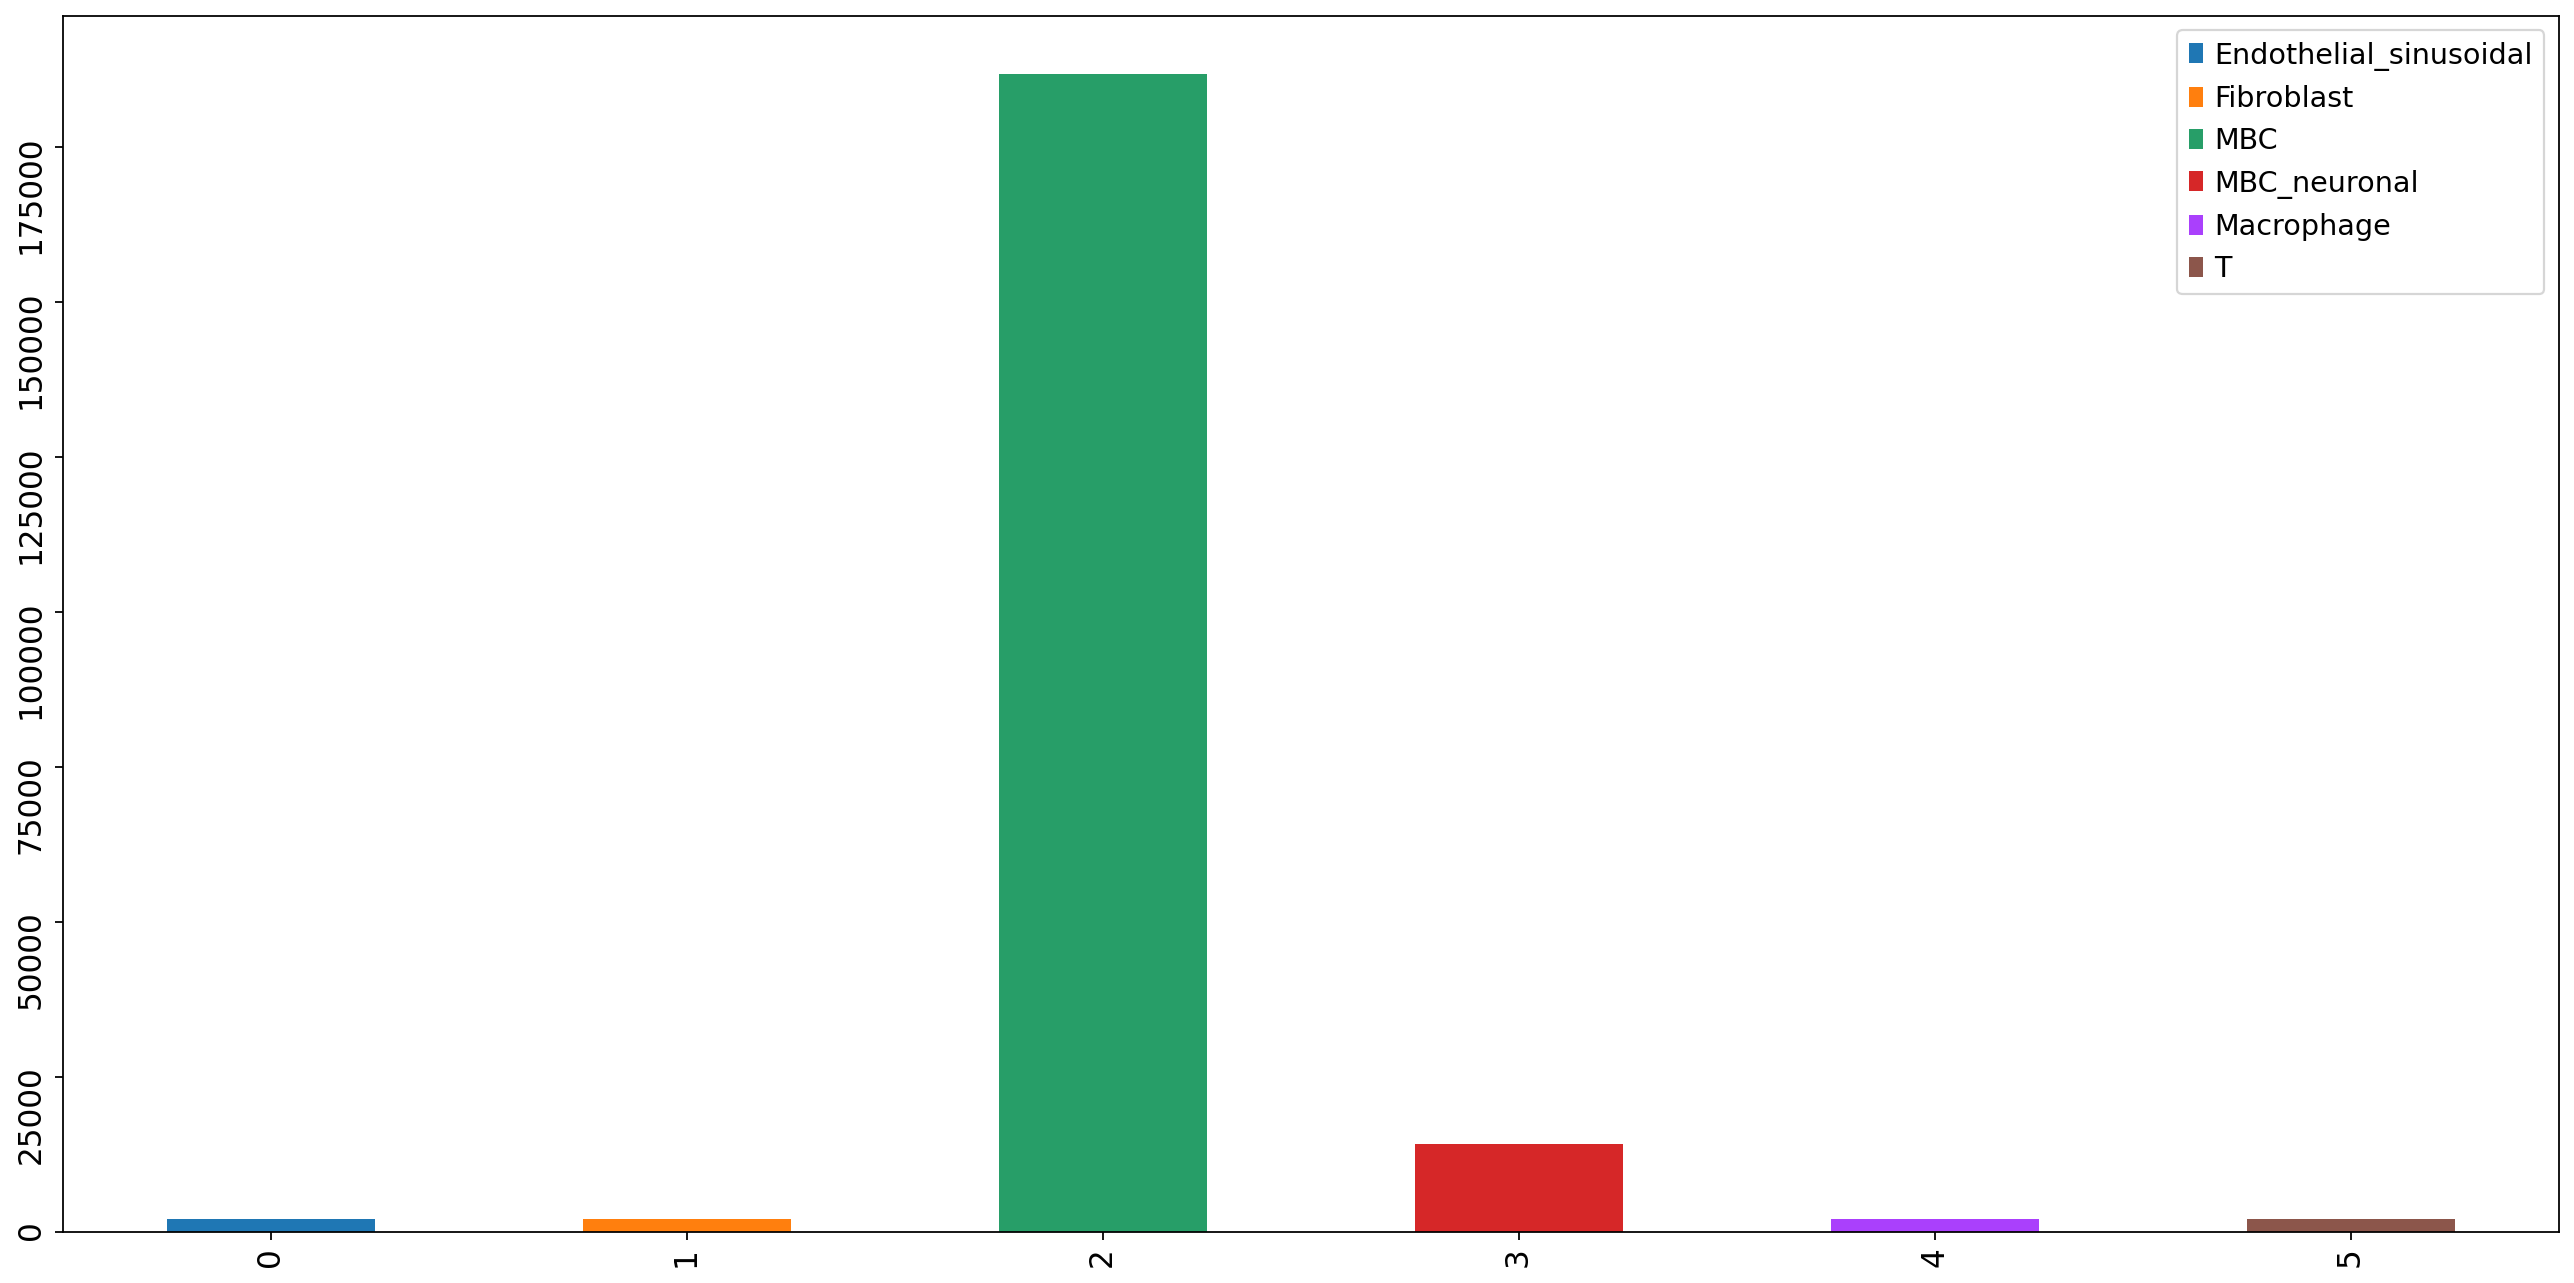

In [ ]:
# plot cell type numbers as sanity check after selecting 2000 random cells from reference cell types

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(adata_frozen_for_inferCNV.obs.groupby(["cell_type"]).size())
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="cell_type").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["cell_type"])
ax.tick_params(labelrotation=90)
ax.grid(False)

In [ ]:
# Unify MBC annotation

celltype_map = {
    "MBC_neuronal": "MBC",
    "Endothelial_sinusoidal": "Endothelial_sinusoidal",
    "MBC": "MBC",
    "Fibroblast": "Fibroblast",
    "Macrophage": "Macrophage",
    "T": "T",
}

adata_frozen_for_inferCNV.obs["celltype_by_patient"] = adata_frozen_for_inferCNV.obs[
    "cell_type"
].map(celltype_map)

/tmp/ipykernel_2863/3562355774.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata_frozen_for_inferCNV.obs['celltype_by_patient'] = adata_frozen_for_inferCNV.obs['cell_type'].map(celltype_map)


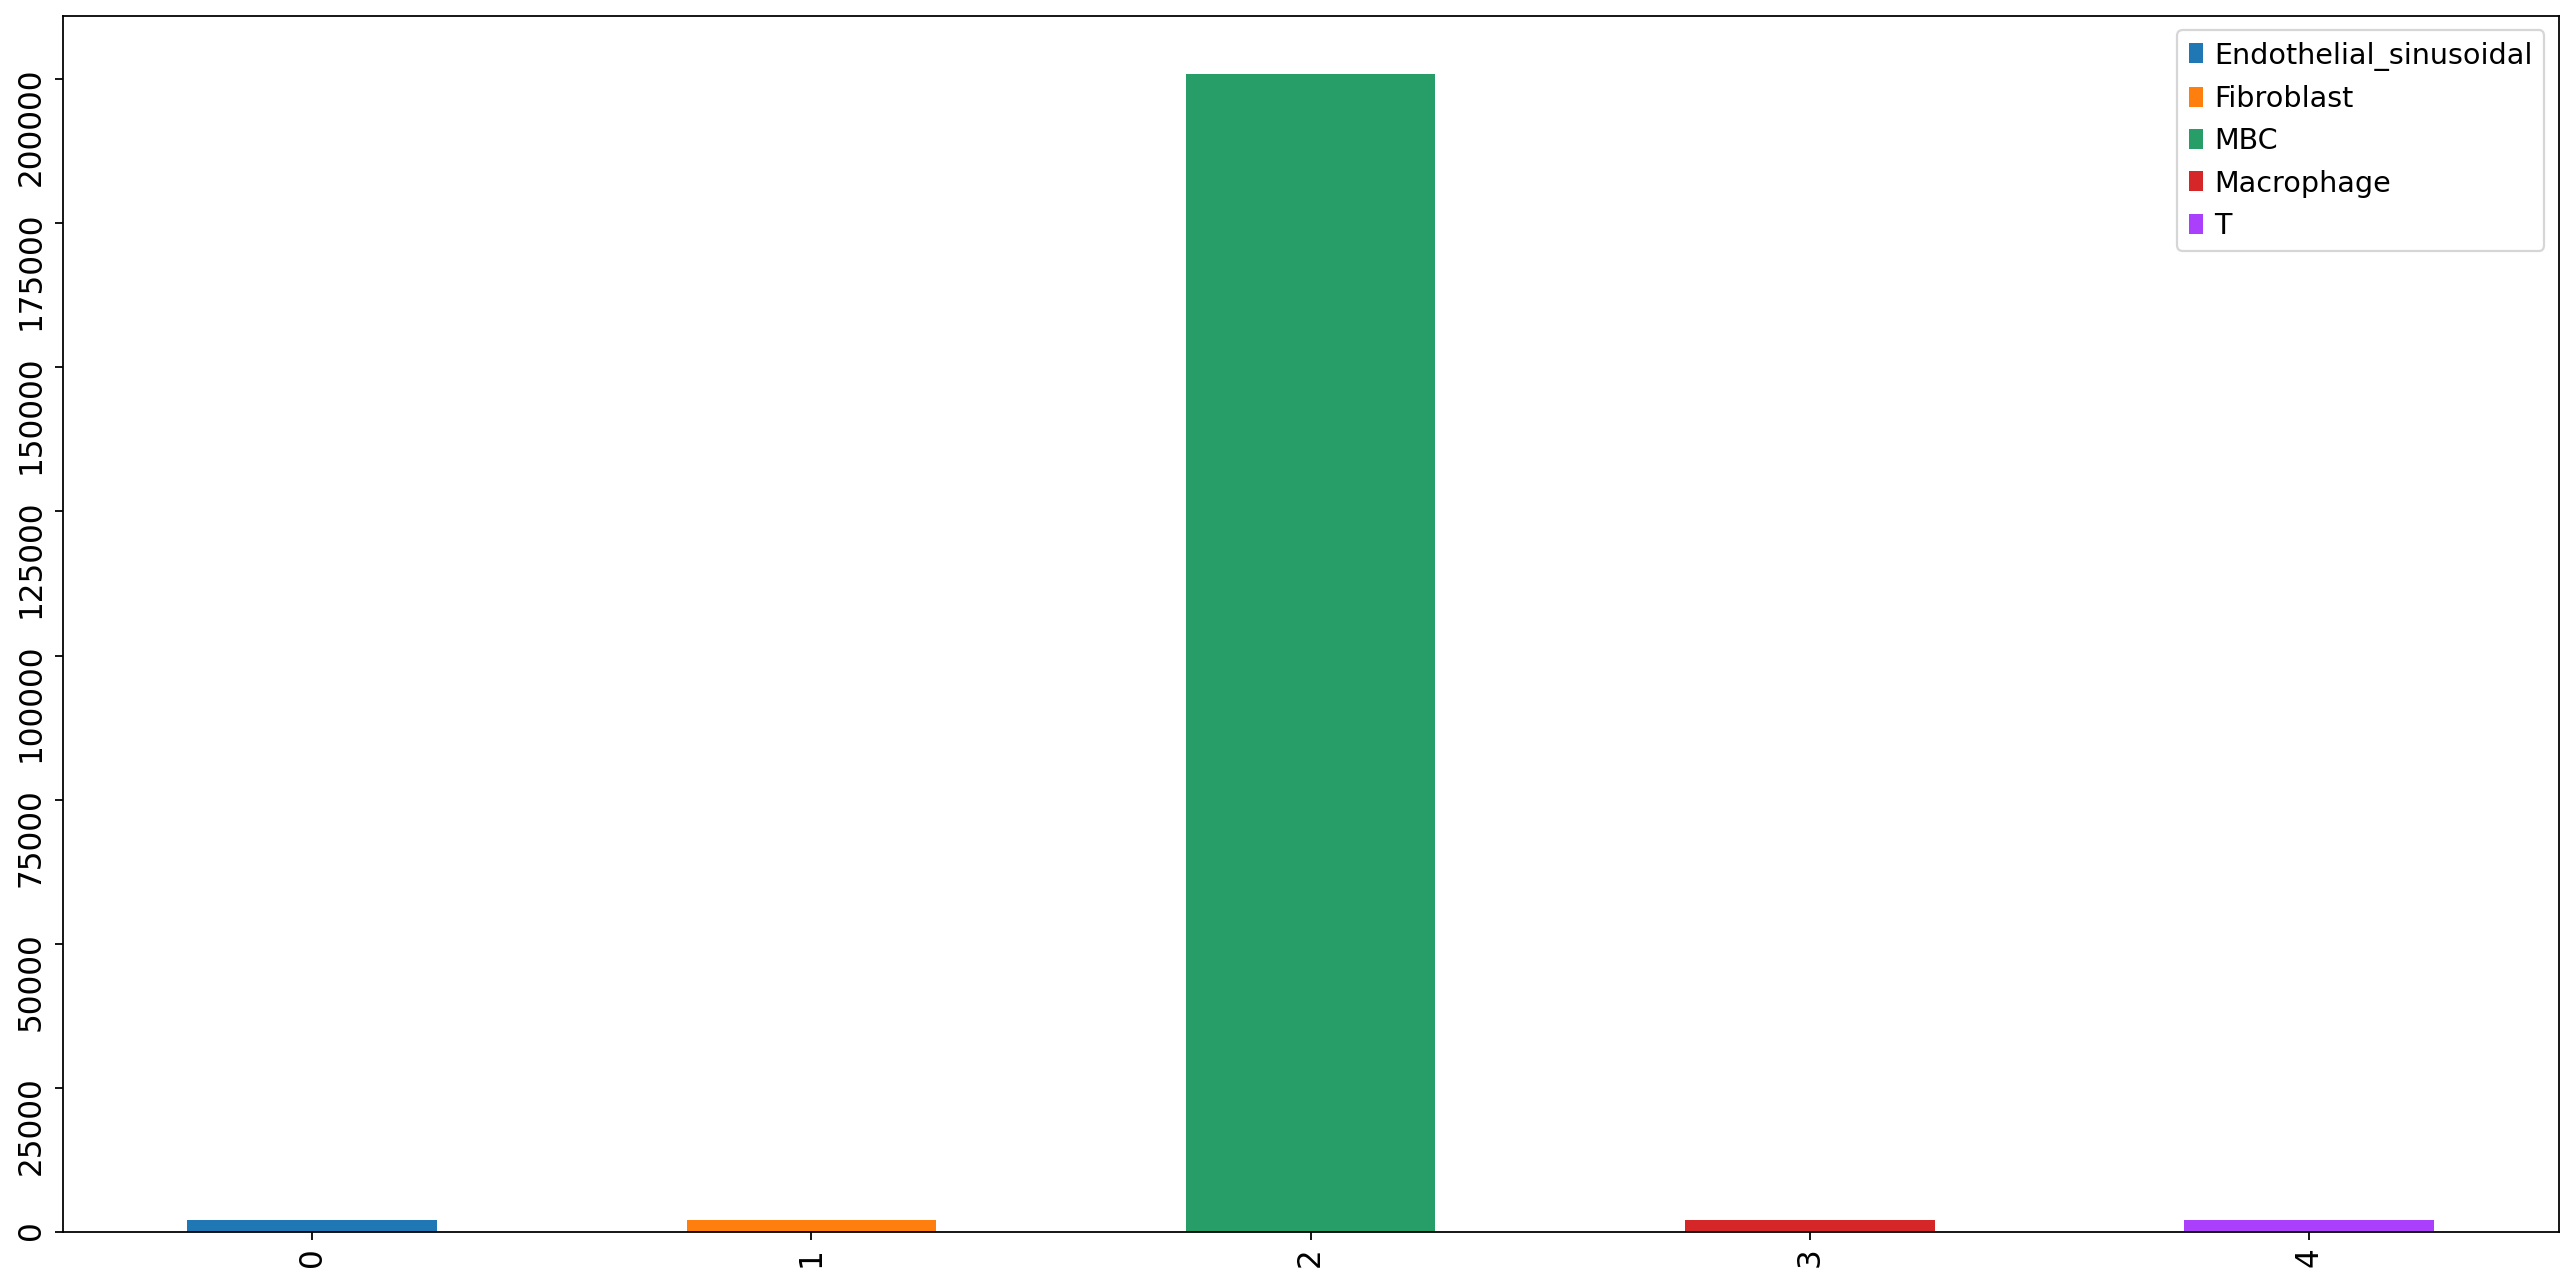

In [ ]:
# plot cell type numbers as sanity check after selecting 2000 random cells from reference cell types

# checking if cells occur everywhere
cell_numbers = pd.DataFrame(
    adata_frozen_for_inferCNV.obs.groupby(["celltype_by_patient"]).size()
)
cell_numbers.reset_index(inplace=True)
cell_numbers

ax = cell_numbers.pivot(columns="celltype_by_patient").plot(kind="bar", stacked=True)
ax.figure.set_size_inches(20, 10)
ax.legend(bbox_to_anchor=(1.0, 1.0), labels=cell_numbers["celltype_by_patient"])
ax.tick_params(labelrotation=90)
ax.grid(False)

In [ ]:
adata_frozen_for_inferCNV.obs.loc[
    adata_frozen_for_inferCNV.obs["celltype_by_patient"] == "MBC", "celltype_by_patient"
] = adata_frozen_for_inferCNV.obs.loc[
    adata_frozen_for_inferCNV.obs["celltype_by_patient"] == "MBC"
][["celltype_by_patient", "name"]].agg("-".join, axis=1)

adata_frozen_for_inferCNV.obs[
    adata_frozen_for_inferCNV.obs["celltype_by_patient"] == "MBC"
]["celltype_by_patient"]
adata_frozen_for_inferCNV.obs["celltype_by_patient"].unique()

array(['MBC-HTAPP-225-SMP-6756', 'Fibroblast', 'Macrophage',
       'Endothelial_sinusoidal', 'T', 'MBC-HTAPP-589-SMP-2851',
       'MBC-HTAPP-231-SMP-6758', 'MBC-HTAPP-862-SMP-7059',
       'MBC-HTAPP-862-SMP-7060', 'MBC-HTAPP-232-SMP-6759',
       'MBC-HTAPP-525-SMP-6765', 'MBC-HTAPP-521-SMP-6763',
       'MBC-HTAPP-944-SMP-7479', 'MBC-HTAPP-889-SMP-7270',
       'MBC-HTAPP-514-SMP-6760', 'MBC-HTAPP-895-SMP-7359',
       'MBC-HTAPP-516-SMP-6761', 'MBC-HTAPP-806-SMP-6789',
       'MBC-HTAPP-963-SMP-4741', 'MBC-HTAPP-887-SMP-7239',
       'MBC-HTAPP-887-SMP-7250', 'MBC-HTAPP-213-SMP-6752',
       'MBC-HTAPP-223-SMP-6755', 'MBC-HTAPP-223-SMP-7537',
       'MBC-HTAPP-752-SMP-4051', 'MBC-HTAPP-211-SMP-6751',
       'MBC-HTAPP-947-SMP-7509', 'MBC-HTAPP-519-SMP-6762',
       'MBC-HTAPP-878-SMP-7149', 'MBC-HTAPP-814-SMP-6879',
       'MBC-HTAPP-880-SMP-7179', 'MBC-HTAPP-835-SMP-6999',
       'MBC-HTAPP-226-SMP-6757', 'MBC-HTAPP-890-SMP-7299',
       'MBC-HTAPP-262-SMP-610', 'MBC-HTAPP-861-SM

In [ ]:
adata_frozen_for_inferCNV = (
    adata_frozen_for_inferCNV.raw.to_adata()
)  # to get .X in same shape as .obsm['counts']

In [ ]:
adata_frozen_for_inferCNV.X = adata_frozen_for_inferCNV.obsm["counts"]

In [ ]:
adata_frozen_for_inferCNV.X = (
    adata_frozen_for_inferCNV.X.toarray()
)  # convert to array so R can read it easily
adata_frozen_for_inferCNV.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
adata_frozen_for_inferCNV

AnnData object with n_obs × n_vars = 209003 × 30770
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_prima

# Add chromosomal location information

In [ ]:
annot = sc.queries.biomart_annotations(
    org="hsapiens",
    attrs=["ensembl_gene_id", "start_position", "end_position", "chromosome_name"],
    host="www.ensembl.org",
)

In [ ]:
annot = annot.astype("str")

In [ ]:
annot.columns = ["ensembl_gene_id", "start", "end", "chromosome"]
annot

,ensembl_gene_id,start,end,chromosome
0,ENSG00000210049,577,647,MT
1,ENSG00000211459,648,1601,MT
2,ENSG00000210077,1602,1670,MT
3,ENSG00000210082,1671,3229,MT
4,ENSG00000209082,3230,3304,MT
...,...,...,...,...
68319,ENSG00000269732,439870,440232,1
68320,ENSG00000284733,450740,451678,1
68321,ENSG00000233653,487101,489906,1
68322,ENSG00000250575,491225,493241,1


In [ ]:
annot = annot[annot["ensembl_gene_id"].isin(adata_frozen_for_inferCNV.var["gene_ids"])]
annot

,ensembl_gene_id,start,end,chromosome
5,ENSG00000198888,3307,4262,MT
9,ENSG00000198763,4470,5511,MT
15,ENSG00000198804,5904,7445,MT
18,ENSG00000198712,7586,8269,MT
20,ENSG00000228253,8366,8572,MT
...,...,...,...,...
68304,ENSG00000143367,151540305,151583583,1
68308,ENSG00000143442,151402724,151459494,1
68310,ENSG00000117676,26529761,26575030,1
68318,ENSG00000236601,358857,366052,1


In [ ]:
adata_frozen_for_inferCNV.var["ensembl_gene_id"] = adata_frozen_for_inferCNV.var[
    "gene_ids"
]

In [ ]:
adata_frozen_for_inferCNV.var = adata_frozen_for_inferCNV.var.merge(
    annot, how="left", on="ensembl_gene_id"
)

In [ ]:
adata_frozen_for_inferCNV.var.loc[:, ["ensembl_gene_id", "start", "end", "chromosome"]]

,ensembl_gene_id,start,end,chromosome
0,ENSG00000243485,29554,31109,1
1,ENSG00000238009,89295,133723,1
2,ENSG00000239906,139790,140339,1
3,ENSG00000241599,160446,161525,1
4,ENSG00000236601,358857,366052,1
...,...,...,...,...
30765,ENSG00000278633,10598,13001,KI270731.1
30766,ENSG00000276345,2585,11802,KI270721.1
30767,ENSG00000275063,41444,41876,KI270726.1
30768,ENSG00000271254,4612,29626,KI270711.1


In [66]:
adata_frozen_for_inferCNV.var.index = adata_frozen_for_inferCNV.var.index.astype(str)

In [ ]:
adata_frozen_for_inferCNV.var["chromosome"] = [
    "chr" + str(i) for i in adata_frozen_for_inferCNV.var["chromosome"]
]
adata_frozen_for_inferCNV.var["chromosome"]
adata_frozen_for_inferCNV.var["chromosome"].unique()

array(['chr1', 'chrnan', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',
       'chrX', 'chr8', 'chr9', 'chr11', 'chr10', 'chr12', 'chr13',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chr19',
       'chrY', 'chr22', 'chr21', 'chrMT', 'chrKI270728.1',
       'chrKI270727.1', 'chrGL000009.2', 'chrGL000194.1', 'chrGL000195.1',
       'chrGL000219.1', 'chrKI270734.1', 'chrGL000213.1', 'chrGL000218.1',
       'chrKI270731.1', 'chrKI270721.1', 'chrKI270726.1', 'chrKI270711.1',
       'chrKI270713.1'], dtype=object)

In [ ]:
adata_frozen_for_inferCNV.var["start"] = adata_frozen_for_inferCNV.var["start"].fillna(
    "0"
)
adata_frozen_for_inferCNV.var["end"] = adata_frozen_for_inferCNV.var["end"].fillna("0")

In [ ]:
adata_frozen_for_inferCNV.var[adata_frozen_for_inferCNV.var["chromosome"] == "chrnan"]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ensembl_gene_id,start,end,chromosome
220,ENSG00000277726,10607,False,10607,0.025443,97.460271,10626.0,ENSG00000277726,0,0,chrnan
244,ENSG00000242349,2576,False,2576,0.006194,99.383205,2587.0,ENSG00000242349,0,0,chrnan
360,ENSG00000255275,1292,False,1292,0.003132,99.690645,1308.0,ENSG00000255275,0,0,chrnan
384,ENSG00000225986,836,False,836,0.002038,99.799829,851.0,ENSG00000225986,0,0,chrnan
418,ENSG00000271840,506,False,506,0.001276,99.878844,533.0,ENSG00000271840,0,0,chrnan
...,...,...,...,...,...,...,...,...,...,...,...
30749,ENSG00000278782,67,False,67,0.000163,99.983958,68.0,ENSG00000278782,0,0,chrnan
30750,ENSG00000277761,14,False,14,0.000036,99.996648,15.0,ENSG00000277761,0,0,chrnan
30751,ENSG00000277666,389,False,389,0.000934,99.906858,390.0,ENSG00000277666,0,0,chrnan
30756,ENSG00000273496,176,False,176,0.000424,99.957859,177.0,ENSG00000273496,0,0,chrnan


In [ ]:
adata_frozen_for_inferCNV.var[
    adata_frozen_for_inferCNV.var["chromosome"].isin(
        [
            "chrGL000009.2",
            "chrGL000194.1",
            "chrGL000195.1",
            "chrGL000213.1",
            "chrGL000218.1",
            "chrGL000219.1",
            "chrKI270711.1",
            "chrKI270713.1",
            "chrKI270721.1",
            "chrKI270726.1",
            "chrKI270727.1",
            "chrKI270728.1",
            "chrKI270731.1",
            "chrKI270734.1",
            "chrnan",
            "chrMT",
            "chrY",
        ]
    )
]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ensembl_gene_id,start,end,chromosome
220,ENSG00000277726,10607,False,10607,0.025443,97.460271,10626.0,ENSG00000277726,0,0,chrnan
244,ENSG00000242349,2576,False,2576,0.006194,99.383205,2587.0,ENSG00000242349,0,0,chrnan
360,ENSG00000255275,1292,False,1292,0.003132,99.690645,1308.0,ENSG00000255275,0,0,chrnan
384,ENSG00000225986,836,False,836,0.002038,99.799829,851.0,ENSG00000225986,0,0,chrnan
418,ENSG00000271840,506,False,506,0.001276,99.878844,533.0,ENSG00000271840,0,0,chrnan
...,...,...,...,...,...,...,...,...,...,...,...
30765,ENSG00000278633,29,False,29,0.000074,99.993056,31.0,ENSG00000278633,10598,13001,chrKI270731.1
30766,ENSG00000276345,701,False,701,0.001690,99.832153,706.0,ENSG00000276345,2585,11802,chrKI270721.1
30767,ENSG00000275063,11,False,11,0.000026,99.997366,11.0,ENSG00000275063,41444,41876,chrKI270726.1
30768,ENSG00000271254,5541,False,5541,0.013308,98.673269,5558.0,ENSG00000271254,4612,29626,chrKI270711.1


In [71]:
adata_frozen_for_inferCNV

AnnData object with n_obs × n_vars = 209003 × 30770
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_prima

In [ ]:
adata_frozen_for_inferCNV.var["chromosome"].unique()

array(['chr1', 'chrnan', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',
       'chrX', 'chr8', 'chr9', 'chr11', 'chr10', 'chr12', 'chr13',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chr19',
       'chrY', 'chr22', 'chr21', 'chrMT', 'chrKI270728.1',
       'chrKI270727.1', 'chrGL000009.2', 'chrGL000194.1', 'chrGL000195.1',
       'chrGL000219.1', 'chrKI270734.1', 'chrGL000213.1', 'chrGL000218.1',
       'chrKI270731.1', 'chrKI270721.1', 'chrKI270726.1', 'chrKI270711.1',
       'chrKI270713.1'], dtype=object)

In [ ]:
adata_frozen_for_inferCNV.X[0:5, 0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Saving data

In [ ]:
adata_frozen_for_inferCNV.write("frozen_selected_for_inferCNV.h5ad")